# pandasql 실습1 (데이터 다루기)

In [47]:
!pip3 install pandasql

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd 
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())

data_dir = '~/aiffel/data/'

bike = pd.read_csv(os.path.join(data_dir, 'bike_dataset.csv'))
orders = pd.read_csv(os.path.join(data_dir, 'orders.csv'))
customers = pd.read_csv(os.path.join(data_dir, 'customers.csv'))
employees = pd.read_csv(os.path.join(data_dir,'employees.csv'))
ds_2020 = pd.read_csv(os.path.join(data_dir, 'DS_JobsSalaries_2020.csv'))
ds_2021 = pd.read_csv(os.path.join(data_dir, 'DS_JobsSalaries_2021.csv'))

print("데이터 준비 완료!")

데이터 준비 완료!


In [11]:
mysql("""

SELECT * 
FROM bike

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [16]:
mysql("""

SELECT dteday, season, weathersit
FROM bike

""")

,dteday,season,weathersit
0,2011-01-01,spring,Clear
1,2011-01-01,spring,Clear
2,2011-01-01,spring,Clear
3,2011-01-01,spring,Clear
4,2011-01-01,spring,Clear
...,...,...,...
17374,2012-12-31,spring,Cloudy
17375,2012-12-31,spring,Cloudy
17376,2012-12-31,spring,Clear
17377,2012-12-31,spring,Clear


In [19]:
mysql("""

SELECT *
FROM bike
WHERE yr = 2012

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2012-01-01,spring,2012,Jan,0,0,Sunday,0,Clear,0.36,0.3788,0.66,0.0000,5,43,48
1,2012-01-01,spring,2012,Jan,1,0,Sunday,0,Clear,0.36,0.3485,0.66,0.1343,15,78,93
2,2012-01-01,spring,2012,Jan,2,0,Sunday,0,Clear,0.32,0.3485,0.76,0.0000,16,59,75
3,2012-01-01,spring,2012,Jan,3,0,Sunday,0,Clear,0.30,0.3333,0.81,0.0000,11,41,52
4,2012-01-01,spring,2012,Jan,4,0,Sunday,0,Clear,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
8730,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
8731,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
8732,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [20]:
mysql("""

SELECT dteday, season, weathersit
FROM bike
WHERE yr = 2012
LIMIT 100

""")

,dteday,season,weathersit
0,2012-01-01,spring,Clear
1,2012-01-01,spring,Clear
2,2012-01-01,spring,Clear
3,2012-01-01,spring,Clear
4,2012-01-01,spring,Clear
...,...,...,...
95,2012-01-05,spring,Cloudy
96,2012-01-05,spring,Clear
97,2012-01-05,spring,Clear
98,2012-01-05,spring,Clear


In [22]:
mysql("""
SELECT *
FROM bike
WHERE season = 'spring'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
4238,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
4239,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
4240,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [23]:
mysql("""

SELECT *
FROM bike
WHERE season != 'spring'



""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-03-21,summer,2011,Mar,0,0,Monday,1,LightRain,0.34,0.3030,0.66,0.3881,2,11,13
1,2011-03-21,summer,2011,Mar,1,0,Monday,1,Cloudy,0.34,0.3030,0.71,0.3881,1,6,7
2,2011-03-21,summer,2011,Mar,2,0,Monday,1,Cloudy,0.34,0.3030,0.71,0.3284,1,5,6
3,2011-03-21,summer,2011,Mar,3,0,Monday,1,Cloudy,0.34,0.3030,0.71,0.3284,0,1,1
4,2011-03-21,summer,2011,Mar,5,0,Monday,1,Clear,0.32,0.3030,0.81,0.2985,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13132,2012-12-20,winter,2012,Dec,19,0,Thursday,1,LightRain,0.34,0.3182,0.71,0.2537,3,115,118
13133,2012-12-20,winter,2012,Dec,20,0,Thursday,1,LightRain,0.34,0.3333,0.76,0.1642,1,49,50
13134,2012-12-20,winter,2012,Dec,21,0,Thursday,1,LightRain,0.34,0.3333,0.76,0.1642,1,25,26
13135,2012-12-20,winter,2012,Dec,22,0,Thursday,1,LightRain,0.34,0.3333,0.87,0.1940,1,20,21


In [25]:
mysql("""

SELECT *
FROM bike
WHERE season <> 'spring'


""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-03-21,summer,2011,Mar,0,0,Monday,1,LightRain,0.34,0.3030,0.66,0.3881,2,11,13
1,2011-03-21,summer,2011,Mar,1,0,Monday,1,Cloudy,0.34,0.3030,0.71,0.3881,1,6,7
2,2011-03-21,summer,2011,Mar,2,0,Monday,1,Cloudy,0.34,0.3030,0.71,0.3284,1,5,6
3,2011-03-21,summer,2011,Mar,3,0,Monday,1,Cloudy,0.34,0.3030,0.71,0.3284,0,1,1
4,2011-03-21,summer,2011,Mar,5,0,Monday,1,Clear,0.32,0.3030,0.81,0.2985,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13132,2012-12-20,winter,2012,Dec,19,0,Thursday,1,LightRain,0.34,0.3182,0.71,0.2537,3,115,118
13133,2012-12-20,winter,2012,Dec,20,0,Thursday,1,LightRain,0.34,0.3333,0.76,0.1642,1,49,50
13134,2012-12-20,winter,2012,Dec,21,0,Thursday,1,LightRain,0.34,0.3333,0.76,0.1642,1,25,26
13135,2012-12-20,winter,2012,Dec,22,0,Thursday,1,LightRain,0.34,0.3333,0.87,0.1940,1,20,21


In [28]:
mysql("""

SELECT *
FROM bike
WHERE hr >= 23
LIMIT 100

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,23,0,Saturday,0,Cloudy,0.46,0.4545,0.88,0.2985,15,24,39
1,2011-01-02,spring,2011,Jan,23,0,Sunday,0,Clear,0.22,0.2273,0.47,0.1642,0,8,8
2,2011-01-03,spring,2011,Jan,23,0,Monday,1,Clear,0.18,0.2121,0.55,0.1045,1,11,12
3,2011-01-04,spring,2011,Jan,23,0,Tuesday,1,Clear,0.20,0.2273,0.69,0.0896,2,9,11
4,2011-01-05,spring,2011,Jan,23,0,Wednesday,1,Clear,0.20,0.2576,0.47,0.0000,1,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-04-07,summer,2011,Apr,23,0,Thursday,1,Clear,0.38,0.3939,0.76,0.2537,9,45,54
96,2011-04-08,summer,2011,Apr,23,0,Friday,1,Cloudy,0.30,0.2879,0.93,0.2239,4,31,35
97,2011-04-09,summer,2011,Apr,23,0,Saturday,0,Cloudy,0.38,0.3939,0.87,0.0896,12,45,57
98,2011-04-10,summer,2011,Apr,23,0,Sunday,0,Clear,0.46,0.4545,0.88,0.3582,5,27,32


In [29]:
mysql("""

SELECT *
FROM bike
WHERE temp < 0.2
LIMIT 100

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-03,spring,2011,Jan,4,0,Monday,1,Clear,0.16,0.1364,0.47,0.3881,0,1,1
1,2011-01-03,spring,2011,Jan,5,0,Monday,1,Clear,0.16,0.1364,0.47,0.2836,0,3,3
2,2011-01-03,spring,2011,Jan,6,0,Monday,1,Clear,0.14,0.1061,0.50,0.3881,0,30,30
3,2011-01-03,spring,2011,Jan,7,0,Monday,1,Clear,0.14,0.1364,0.50,0.1940,1,63,64
4,2011-01-03,spring,2011,Jan,8,0,Monday,1,Clear,0.14,0.1212,0.50,0.2836,1,153,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-11,spring,2011,Jan,1,0,Tuesday,1,Clear,0.14,0.1515,0.59,0.1642,0,3,3
96,2011-01-11,spring,2011,Jan,2,0,Tuesday,1,Cloudy,0.16,0.1515,0.55,0.1940,0,3,3
97,2011-01-11,spring,2011,Jan,5,0,Tuesday,1,Cloudy,0.16,0.1818,0.55,0.1343,0,6,6
98,2011-01-11,spring,2011,Jan,6,0,Tuesday,1,Cloudy,0.16,0.1818,0.55,0.1343,0,27,27


In [30]:
mysql("""

SELECT *
FROM bike
WHERE cnt = 100

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-04,spring,2011,Jan,9,0,Tuesday,1,Clear,0.16,0.1515,0.64,0.2239,2,98,100
1,2011-02-08,spring,2011,Feb,7,0,Tuesday,1,Clear,0.24,0.1970,0.65,0.4179,3,97,100
2,2011-03-16,spring,2011,Mar,14,0,Wednesday,1,Cloudy,0.40,0.4091,0.76,0.2239,33,67,100
3,2011-03-26,summer,2011,Mar,9,0,Saturday,0,Clear,0.24,0.2424,0.41,0.1343,32,68,100
4,2011-05-01,summer,2011,May,22,0,Sunday,0,Cloudy,0.46,0.4545,0.82,0.0000,32,68,100
5,2011-05-08,summer,2011,May,0,0,Sunday,0,Cloudy,0.50,0.4848,0.59,0.1045,22,78,100
6,2011-05-14,summer,2011,May,9,0,Saturday,0,Cloudy,0.52,0.5000,0.94,0.0896,14,86,100
7,2011-06-23,fall,2011,Jun,6,0,Thursday,1,Clear,0.72,0.6970,0.74,0.1642,8,92,100
8,2011-08-01,fall,2011,Aug,6,0,Monday,1,Clear,0.66,0.6061,0.83,0.0896,3,97,100
9,2011-12-17,winter,2011,Dec,9,0,Saturday,0,Cloudy,0.26,0.2424,0.56,0.2537,5,95,100


In [31]:
mysql("""

SELECT *
FROM bike
WHERE yr = 2011
LIMIT 100

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05,spring,2011,Jan,4,0,Wednesday,1,Clear,0.24,0.2273,0.48,0.2239,0,2,2
96,2011-01-05,spring,2011,Jan,5,0,Wednesday,1,Clear,0.22,0.2273,0.47,0.1642,0,3,3
97,2011-01-05,spring,2011,Jan,6,0,Wednesday,1,Clear,0.20,0.1970,0.47,0.2239,0,33,33
98,2011-01-05,spring,2011,Jan,7,0,Wednesday,1,Clear,0.18,0.1818,0.43,0.1940,1,87,88


In [32]:
mysql("""

SELECT *
FROM bike
WHERE yr = 2011
AND season = 'winter'
LIMIT 100

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-09-23,winter,2011,Sep,0,0,Friday,1,Cloudy,0.62,0.5455,0.94,0.0896,11,41,52
1,2011-09-23,winter,2011,Sep,1,0,Friday,1,Cloudy,0.60,0.5000,1.00,0.0000,2,29,31
2,2011-09-23,winter,2011,Sep,2,0,Friday,1,Cloudy,0.60,0.5000,1.00,0.1045,6,14,20
3,2011-09-23,winter,2011,Sep,3,0,Friday,1,Cloudy,0.60,0.5000,1.00,0.0000,3,5,8
4,2011-09-23,winter,2011,Sep,4,0,Friday,1,LightRain,0.60,0.5000,1.00,0.0000,6,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-09-26,winter,2011,Sep,23,0,Monday,1,Clear,0.62,0.5455,0.94,0.1343,11,64,75
96,2011-09-27,winter,2011,Sep,0,0,Tuesday,1,Clear,0.62,0.5455,0.94,0.1343,9,28,37
97,2011-09-27,winter,2011,Sep,1,0,Tuesday,1,Clear,0.62,0.5455,0.94,0.1642,4,6,10
98,2011-09-27,winter,2011,Sep,2,0,Tuesday,1,Clear,0.62,0.5455,0.94,0.1045,7,4,11


In [33]:
mysql("""

SELECT *
FROM bike
WHERE yr = 2011
AND season = 'spring'


""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,2011-12-31,spring,2011,Dec,19,0,Saturday,0,Clear,0.42,0.4242,0.54,0.2239,19,73,92
2064,2011-12-31,spring,2011,Dec,20,0,Saturday,0,Clear,0.42,0.4242,0.54,0.2239,8,63,71
2065,2011-12-31,spring,2011,Dec,21,0,Saturday,0,Clear,0.40,0.4091,0.58,0.1940,2,50,52
2066,2011-12-31,spring,2011,Dec,22,0,Saturday,0,Clear,0.38,0.3939,0.62,0.1343,2,36,38


In [34]:
mysql("""

SELECT *
FROM bike
WHERE yr = 2011
AND season = 'spring'
AND hr = 22

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,22,0,Saturday,0,Cloudy,0.40,0.4091,0.94,0.2239,11,17,28
1,2011-01-02,spring,2011,Jan,22,0,Sunday,0,Clear,0.24,0.2121,0.44,0.2985,0,9,9
2,2011-01-03,spring,2011,Jan,22,0,Monday,1,Clear,0.14,0.1515,0.69,0.1343,0,20,20
3,2011-01-04,spring,2011,Jan,22,0,Tuesday,1,Clear,0.22,0.2576,0.64,0.0896,1,34,35
4,2011-01-05,spring,2011,Jan,22,0,Wednesday,1,Clear,0.18,0.1970,0.55,0.1343,1,41,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2011-12-27,spring,2011,Dec,22,0,Tuesday,1,Clear,0.32,0.3333,0.87,0.0896,3,29,32
85,2011-12-28,spring,2011,Dec,22,0,Wednesday,1,Clear,0.22,0.2424,0.44,0.1045,2,31,33
86,2011-12-29,spring,2011,Dec,22,0,Thursday,1,Clear,0.28,0.2879,0.65,0.1343,7,48,55
87,2011-12-30,spring,2011,Dec,22,0,Friday,1,Cloudy,0.34,0.3333,0.71,0.1642,7,78,85


In [35]:
mysql("""  

SELECT *
FROM bike
WHERE yr
 = 2011
AND season = 'spring'
AND weekday = 'Sunday'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-02,spring,2011,Jan,0,0,Sunday,0,Cloudy,0.46,0.4545,0.88,0.2985,4,13,17
1,2011-01-02,spring,2011,Jan,1,0,Sunday,0,Cloudy,0.44,0.4394,0.94,0.2537,1,16,17
2,2011-01-02,spring,2011,Jan,2,0,Sunday,0,Cloudy,0.42,0.4242,1.00,0.2836,1,8,9
3,2011-01-02,spring,2011,Jan,3,0,Sunday,0,Cloudy,0.46,0.4545,0.94,0.1940,2,4,6
4,2011-01-02,spring,2011,Jan,4,0,Sunday,0,Cloudy,0.46,0.4545,0.94,0.1940,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2011-12-25,spring,2011,Dec,19,0,Sunday,0,Clear,0.32,0.3333,0.57,0.1343,2,14,16
299,2011-12-25,spring,2011,Dec,20,0,Sunday,0,Clear,0.32,0.3333,0.49,0.0896,8,18,26
300,2011-12-25,spring,2011,Dec,21,0,Sunday,0,Clear,0.30,0.3030,0.56,0.1343,4,15,19
301,2011-12-25,spring,2011,Dec,22,0,Sunday,0,Clear,0.28,0.2727,0.61,0.1642,2,15,17


In [36]:
mysql("""

SELECT *
FROM bike
WHERE mnth IN ('Jan', 'May', 'Mar')

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,2012-05-31,summer,2012,May,19,0,Thursday,1,Clear,0.72,0.6515,0.34,0.1642,104,487,591
4386,2012-05-31,summer,2012,May,20,0,Thursday,1,Clear,0.68,0.6364,0.44,0.1642,88,391,479
4387,2012-05-31,summer,2012,May,21,0,Thursday,1,Clear,0.68,0.6364,0.44,0.1642,41,318,359
4388,2012-05-31,summer,2012,May,22,0,Thursday,1,Clear,0.66,0.6212,0.50,0.1642,43,221,264


In [37]:
mysql("""

SELECT *
FROM bike
WHERE mnth NOT IN ('Jan', 'Mar', 'May')

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-02-01,spring,2011,Feb,0,0,Tuesday,1,Cloudy,0.16,0.1818,0.64,0.1045,2,6,8
1,2011-02-01,spring,2011,Feb,1,0,Tuesday,1,Cloudy,0.16,0.1818,0.69,0.1045,0,3,3
2,2011-02-01,spring,2011,Feb,2,0,Tuesday,1,Cloudy,0.16,0.2273,0.69,0.0000,0,2,2
3,2011-02-01,spring,2011,Feb,3,0,Tuesday,1,Cloudy,0.16,0.2273,0.69,0.0000,0,2,2
4,2011-02-01,spring,2011,Feb,5,0,Tuesday,1,LightRain,0.14,0.2121,0.93,0.0000,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12984,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
12985,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
12986,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
12987,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [38]:
mysql(""" 

SELECT *
FROM bike
WHERE mnth NOT IN ('Jan', 'Mar', 'May')
AND cnt > 10

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-02-01,spring,2011,Feb,6,0,Tuesday,1,LightRain,0.14,0.2121,0.93,0.0000,0,22,22
1,2011-02-01,spring,2011,Feb,7,0,Tuesday,1,LightRain,0.16,0.2273,0.93,0.0000,0,52,52
2,2011-02-01,spring,2011,Feb,8,0,Tuesday,1,LightRain,0.16,0.2273,0.93,0.0000,3,132,135
3,2011-02-01,spring,2011,Feb,9,0,Tuesday,1,Cloudy,0.16,0.2273,0.93,0.0000,2,114,116
4,2011-02-01,spring,2011,Feb,10,0,Tuesday,1,Cloudy,0.16,0.2273,0.93,0.0000,0,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11609,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
11610,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
11611,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
11612,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [39]:
mysql("""

SELECT *
FROM bike
WHERE weathersit IS NULL

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-02-19,spring,2011,Feb,11,0,Saturday,0,None,0.44,0.4394,0.16,0.5821,47,76,123


In [40]:
mysql("""

SELECT *
FROM bike
WHERE weathersit IS NOT NULL

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17374,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17375,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17376,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [44]:
mysql("""

SELECT *
FROM bike
WHERE dteday Between '2011-03-30' and '2011-03-31'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-03-30,summer,2011,Mar,0,0,Wednesday,1,Cloudy,0.32,0.3485,0.57,0.0000,3,8,11
1,2011-03-30,summer,2011,Mar,1,0,Wednesday,1,Clear,0.32,0.3485,0.39,0.0000,1,9,10
2,2011-03-30,summer,2011,Mar,2,0,Wednesday,1,Cloudy,0.32,0.3485,0.57,0.0000,0,4,4
3,2011-03-30,summer,2011,Mar,3,0,Wednesday,1,Cloudy,0.32,0.3485,0.49,0.0000,0,4,4
4,2011-03-30,summer,2011,Mar,4,0,Wednesday,1,Cloudy,0.32,0.3485,0.57,0.0000,1,0,1
5,2011-03-30,summer,2011,Mar,5,0,Wednesday,1,Cloudy,0.30,0.2879,0.56,0.1940,0,7,7
6,2011-03-30,summer,2011,Mar,6,0,Wednesday,1,Cloudy,0.30,0.3030,0.49,0.1343,4,44,48
7,2011-03-30,summer,2011,Mar,7,0,Wednesday,1,Cloudy,0.32,0.3333,0.45,0.1045,8,128,136
8,2011-03-30,summer,2011,Mar,8,0,Wednesday,1,Cloudy,0.32,0.3182,0.49,0.1642,16,247,263
9,2011-03-30,summer,2011,Mar,9,0,Wednesday,1,Cloudy,0.32,0.3030,0.45,0.2239,7,147,154


In [46]:
mysql("""

SELECT *
FROM bike
WHERE dteday >= '2011-03-30' 
AND dteday <= '2011-03-31'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-03-30,summer,2011,Mar,0,0,Wednesday,1,Cloudy,0.32,0.3485,0.57,0.0000,3,8,11
1,2011-03-30,summer,2011,Mar,1,0,Wednesday,1,Clear,0.32,0.3485,0.39,0.0000,1,9,10
2,2011-03-30,summer,2011,Mar,2,0,Wednesday,1,Cloudy,0.32,0.3485,0.57,0.0000,0,4,4
3,2011-03-30,summer,2011,Mar,3,0,Wednesday,1,Cloudy,0.32,0.3485,0.49,0.0000,0,4,4
4,2011-03-30,summer,2011,Mar,4,0,Wednesday,1,Cloudy,0.32,0.3485,0.57,0.0000,1,0,1
5,2011-03-30,summer,2011,Mar,5,0,Wednesday,1,Cloudy,0.30,0.2879,0.56,0.1940,0,7,7
6,2011-03-30,summer,2011,Mar,6,0,Wednesday,1,Cloudy,0.30,0.3030,0.49,0.1343,4,44,48
7,2011-03-30,summer,2011,Mar,7,0,Wednesday,1,Cloudy,0.32,0.3333,0.45,0.1045,8,128,136
8,2011-03-30,summer,2011,Mar,8,0,Wednesday,1,Cloudy,0.32,0.3182,0.49,0.1642,16,247,263
9,2011-03-30,summer,2011,Mar,9,0,Wednesday,1,Cloudy,0.32,0.3030,0.45,0.2239,7,147,154


In [49]:
mysql("""

SELECT dteday, dteday + 2, weekday, weekday + 3
FROM bike


""")

,dteday,dteday + 2,weekday,weekday + 3
0,2011-01-01,2013,Saturday,3
1,2011-01-01,2013,Saturday,3
2,2011-01-01,2013,Saturday,3
3,2011-01-01,2013,Saturday,3
4,2011-01-01,2013,Saturday,3
...,...,...,...,...
17374,2012-12-31,2014,Monday,3
17375,2012-12-31,2014,Monday,3
17376,2012-12-31,2014,Monday,3
17377,2012-12-31,2014,Monday,3


In [55]:
mysql("""

SELECT temp, temp + 2, temp -2, temp * 2, temp / 2
FROM bike

""")

,temp,temp + 2,temp -2,temp * 2,temp / 2
0,0.24,2.24,-1.76,0.48,0.12
1,0.22,2.22,-1.78,0.44,0.11
2,0.22,2.22,-1.78,0.44,0.11
3,0.24,2.24,-1.76,0.48,0.12
4,0.24,2.24,-1.76,0.48,0.12
...,...,...,...,...,...
17374,0.26,2.26,-1.74,0.52,0.13
17375,0.26,2.26,-1.74,0.52,0.13
17376,0.26,2.26,-1.74,0.52,0.13
17377,0.26,2.26,-1.74,0.52,0.13


# pandasql 실습2 (데이터 활용)

In [12]:
import os
import pandas as pd 
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())

data_dir = '~/aiffel/data/'

bike = pd.read_csv(os.path.join(data_dir, 'bike_dataset.csv'))
orders = pd.read_csv(os.path.join(data_dir, 'orders.csv'))
customers = pd.read_csv(os.path.join(data_dir, 'customers.csv'))
employees = pd.read_csv(os.path.join(data_dir,'employees.csv'))
ds_2020 = pd.read_csv(os.path.join(data_dir, 'DS_JobsSalaries_2020.csv'))
ds_2021 = pd.read_csv(os.path.join(data_dir, 'DS_JobsSalaries_2021.csv'))

In [15]:
mysql("""

SELECT *
FROM bike

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [51]:
mysql("""

SELECT *
FROM bike
WHERE hr = 0
AND weekday LIKE '%Sa%'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-08,spring,2011,Jan,0,0,Saturday,0,Cloudy,0.18,0.1970,0.51,0.1642,1,24,25
2,2011-01-15,spring,2011,Jan,0,0,Saturday,0,Clear,0.18,0.2424,0.55,0.0000,3,25,28
3,2011-01-22,spring,2011,Jan,0,0,Saturday,0,Clear,0.04,0.0303,0.45,0.2537,0,13,13
4,2011-01-29,spring,2011,Jan,0,0,Saturday,0,Clear,0.22,0.1970,0.64,0.3582,2,26,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2012-12-01,winter,2012,Dec,0,0,Saturday,0,Clear,0.26,0.3030,0.81,0.0000,9,99,108
101,2012-12-08,winter,2012,Dec,0,0,Saturday,0,Cloudy,0.36,0.3636,0.93,0.0896,5,98,103
102,2012-12-15,winter,2012,Dec,0,0,Saturday,0,Clear,0.30,0.3333,0.70,0.0000,4,90,94
103,2012-12-22,spring,2012,Dec,0,0,Saturday,0,Clear,0.26,0.2121,0.44,0.5821,1,30,31


In [18]:
mysql("""

SELECT *
FROM bike
WHERE hr = 0
AND weathersit LIKE 'Cl%'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-02,spring,2011,Jan,0,0,Sunday,0,Cloudy,0.46,0.4545,0.88,0.2985,4,13,17
2,2011-01-03,spring,2011,Jan,0,0,Monday,1,Clear,0.22,0.1970,0.44,0.3582,0,5,5
3,2011-01-04,spring,2011,Jan,0,0,Tuesday,1,Clear,0.16,0.1818,0.55,0.1045,0,5,5
4,2011-01-05,spring,2011,Jan,0,0,Wednesday,1,Clear,0.20,0.2576,0.64,0.0000,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,2012-12-26,spring,2012,Dec,0,0,Wednesday,1,Cloudy,0.28,0.2727,0.65,0.2537,1,8,9
670,2012-12-28,spring,2012,Dec,0,0,Friday,1,Cloudy,0.24,0.2424,0.60,0.1642,3,22,25
671,2012-12-29,spring,2012,Dec,0,0,Saturday,0,Cloudy,0.24,0.2424,0.70,0.0000,1,25,26
672,2012-12-30,spring,2012,Dec,0,0,Sunday,0,Cloudy,0.26,0.2576,0.60,0.1642,0,41,41


In [19]:
mysql("""

SELECT *
FROM bike
WHERE hr = 0
AND mnth LIKE 'ma_'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-03-01,spring,2011,Mar,0,0,Tuesday,1,Clear,0.30,0.2727,0.70,0.4627,0,7,7
1,2011-03-02,spring,2011,Mar,0,0,Wednesday,1,Clear,0.22,0.2273,0.69,0.1642,3,5,8
2,2011-03-03,spring,2011,Mar,0,0,Thursday,1,Clear,0.24,0.1970,0.30,0.4627,3,10,13
3,2011-03-04,spring,2011,Mar,0,0,Friday,1,Cloudy,0.20,0.1970,0.55,0.1940,0,12,12
4,2011-03-05,spring,2011,Mar,0,0,Saturday,0,Cloudy,0.28,0.2879,0.81,0.1045,4,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2012-05-27,summer,2012,May,0,0,Sunday,0,Cloudy,0.68,0.6364,0.69,0.1642,48,89,137
120,2012-05-28,summer,2012,May,0,1,Monday,0,Clear,0.62,0.5758,0.83,0.2239,21,44,65
121,2012-05-29,summer,2012,May,0,0,Tuesday,1,Clear,0.70,0.6667,0.79,0.1940,12,33,45
122,2012-05-30,summer,2012,May,0,0,Wednesday,1,LightRain,0.64,0.5758,0.89,0.1045,4,32,36


In [20]:
mysql("""

SELECT *
FROM bike
WHERE hr = 0
AND mnth LIKE 'ma_'
AND weekday LIKE '%ur%'

""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-03-03,spring,2011,Mar,0,0,Thursday,1,Clear,0.24,0.1970,0.30,0.4627,3,10,13
1,2011-03-05,spring,2011,Mar,0,0,Saturday,0,Cloudy,0.28,0.2879,0.81,0.1045,4,15,19
2,2011-03-10,spring,2011,Mar,0,0,Thursday,1,LightRain,0.34,0.3182,0.00,0.2537,3,0,3
3,2011-03-12,spring,2011,Mar,0,0,Saturday,0,Clear,0.26,0.2727,0.60,0.1343,4,30,34
4,2011-03-17,spring,2011,Mar,0,0,Thursday,1,Clear,0.38,0.3939,0.66,0.2537,4,19,23
5,2011-03-19,spring,2011,Mar,0,0,Saturday,0,Cloudy,0.60,0.6212,0.53,0.2537,26,50,76
6,2011-03-24,summer,2011,Mar,0,0,Thursday,1,Cloudy,0.32,0.3030,0.93,0.2239,0,11,11
7,2011-03-26,summer,2011,Mar,0,0,Saturday,0,Cloudy,0.26,0.2424,0.38,0.2836,3,25,28
8,2011-03-31,summer,2011,Mar,0,0,Thursday,1,LightRain,0.24,0.2273,0.93,0.2239,0,3,3
9,2011-05-05,summer,2011,May,0,0,Thursday,1,Clear,0.36,0.3485,0.66,0.1940,4,23,27


In [54]:
mysql("""
      SELECT temp, hum AS 'humidity'
      FROM bike
      LIMIT 5
""")

,temp,humidity
0,0.24,0.81
1,0.22,0.80
2,0.22,0.80
3,0.24,0.75
4,0.24,0.75


In [55]:
mysql(""" SELECT temp, hum AS 'humidity' FROM bike LIMIT 5 """)

,temp,humidity
0,0.24,0.81
1,0.22,0.80
2,0.22,0.80
3,0.24,0.75
4,0.24,0.75


In [22]:
mysql("""
SELECT b.temp, b.hum AS 'humidity'
FROM bike AS b
LIMIT 5
""")

,temp,humidity
0,0.24,0.81
1,0.22,0.80
2,0.22,0.80
3,0.24,0.75
4,0.24,0.75


In [28]:
mysql("""
SELECT dteday, temp, cnt
      FROM bike
      ORDER BY cnt, temp
      LIMIT 50
""")

,dteday,temp,cnt
0,2011-01-24,0.02,1
1,2012-01-04,0.02,1
2,2012-01-04,0.02,1
3,2011-01-23,0.04,1
4,2011-01-24,0.04,1
5,2011-01-24,0.04,1
6,2011-01-09,0.08,1
7,2011-01-09,0.08,1
8,2011-01-09,0.10,1
9,2011-01-14,0.10,1


In [30]:
mysql("""
SELECT dteday, temp, cnt
      FROM bike
      ORDER BY 3 ASC, 2
      LIMIT 100
""")

,dteday,temp,cnt
0,2011-01-24,0.02,1
1,2012-01-04,0.02,1
2,2012-01-04,0.02,1
3,2011-01-23,0.04,1
4,2011-01-24,0.04,1
...,...,...,...
95,2012-11-28,0.26,1
96,2012-12-26,0.26,1
97,2011-02-08,0.28,1
98,2011-03-24,0.28,1


In [31]:
mysql("""
SELECT DISTINCT weekday, weathersit
      FROM bike
""")

,weekday,weathersit
0,Saturday,Clear
1,Saturday,Cloudy
2,Saturday,LightRain
3,Sunday,Cloudy
4,Sunday,LightRain
5,Sunday,Clear
6,Monday,Clear
7,Tuesday,Clear
8,Tuesday,Cloudy
9,Wednesday,Clear


In [32]:
mysql("""

SELECT DISTINCT yr, weekday, weathersit
      FROM bike
""")

,yr,weekday,weathersit
0,2011,Saturday,Clear
1,2011,Saturday,Cloudy
2,2011,Saturday,LightRain
3,2011,Sunday,Cloudy
4,2011,Sunday,LightRain
5,2011,Sunday,Clear
6,2011,Monday,Clear
7,2011,Tuesday,Clear
8,2011,Tuesday,Cloudy
9,2011,Wednesday,Clear


In [33]:
mysql("""

SELECT *
      FROM customers
""")

,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,103,Unai Bustinza,40.32.2555,1992. 2. 2,"54, rue Royale",Nantes,44000,France,21000,1001
1,112,Igor Bubnjic,7025551838,1992. 7. 17,8489 Strong St.,Las Vegas,83030,USA,71800,1001
2,114,Gideon Jung,03 9520 4555,1994. 9. 12,636 St Kilda Road,Melbourne,3004,Australia,117300,1001
3,119,Alberto Aquilani,40.67.8555,1984. 7. 7,"67, rue des Cinquante Otages",Nantes,44000,France,118200,1001
4,121,Nicola Strambelli,07-98 9555,1988. 9. 6,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001
...,...,...,...,...,...,...,...,...,...,...
118,487,Jeroen Vanthournout,4155554312,1989. 6. 29,2793 Furth Circle,Brisbane,94217,USA,60300,1005
119,489,Raul Rusescu,(171) 555-7555,1988. 7. 9,120 Hanover Sq.,London,WA1 1DP,UK,43300,1005
120,495,Konstantinos Fortounis,6175552555,1992. 10. 16,6251 Ingle Ln.,Boston,51003,USA,85100,1005
121,496,Sami,+64 9 5555500,1988. 12. 18,Arenales 1938 3'A',Auckland,None,New Zealand,110000,1005


In [57]:
mysql("""

SELECT customerName AS '고객명'
      , birthday AS '생년월일'
      , iif(birthday >= '1990-01-01', '이후', '이전') AS '1990년 기준'
      FROM customers
""")

,고객명,생년월일,1990년 기준
0,Unai Bustinza,1992. 2. 2,이후
1,Igor Bubnjic,1992. 7. 17,이후
2,Gideon Jung,1994. 9. 12,이후
3,Alberto Aquilani,1984. 7. 7,이전
4,Nicola Strambelli,1988. 9. 6,이전
...,...,...,...
118,Jeroen Vanthournout,1989. 6. 29,이전
119,Raul Rusescu,1988. 7. 9,이전
120,Konstantinos Fortounis,1992. 10. 16,이후
121,Sami,1988. 12. 18,이전


In [35]:
mysql("""

SELECT customerName AS creditLimit
      , CASE WHEN creditLimit <= 50000 THEN '5만원이하'
            WHEN creditLimit <= 100000 THEN '10만원이하'
            ELSE '10만원초과'
      END AS '고객한도분리'
FROM customers
""")

,creditLimit,고객한도분리
0,Unai Bustinza,5만원이하
1,Igor Bubnjic,10만원이하
2,Gideon Jung,10만원초과
3,Alberto Aquilani,10만원초과
4,Nicola Strambelli,10만원이하
...,...,...
118,Jeroen Vanthournout,10만원이하
119,Raul Rusescu,5만원이하
120,Konstantinos Fortounis,10만원이하
121,Sami,10만원초과


In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  object 
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  object 
 7   workingday  17379 non-null  int64  
 8   weathersit  17378 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 2.1+ MB


In [37]:
mysql("""
SELECT *
      FROM bike
      WHERE yr = 2011
      LIMIT 5
""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [38]:
mysql("""
SELECT CAST(yr AS varchar) AS yr
      FROM bike
      LIMIT 5
""")

,yr
0,2011
1,2011
2,2011
3,2011
4,2011


In [39]:
mysql("""
SELECT CAST(yr AS varchar) AS yr
      FROM bike
      WHERE CAST(yr AS varchar) = '2011'
      LIMIT 5
""")

,yr
0,2011
1,2011
2,2011
3,2011
4,2011


# pandasql 실습3 (집계)

In [15]:
import os
import pandas as pd 
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())

data_dir = '~/aiffel/data/'

bike = pd.read_csv(os.path.join(data_dir, 'bike_dataset.csv'))
orders = pd.read_csv(os.path.join(data_dir, 'orders.csv'))
customers = pd.read_csv(os.path.join(data_dir, 'customers.csv'))
employees = pd.read_csv(os.path.join(data_dir,'employees.csv'))
ds_2020 = pd.read_csv(os.path.join(data_dir, 'DS_JobsSalaries_2020.csv'))
ds_2021 = pd.read_csv(os.path.join(data_dir, 'DS_JobsSalaries_2021.csv'))

In [58]:
mysql("""
SELECT *
      FROM bike
      WHERE weathersit IS NULL
""")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-02-19,spring,2011,Feb,11,0,Saturday,0,None,0.44,0.4394,0.16,0.5821,47,76,123


In [59]:
mysql("""
SELECT COUNT(*) AS cnt
      , COUNT(weathersit) AS weather_cnt
      FROM bike
""")

,cnt,weather_cnt
0,17379,17378


In [60]:
mysql("""
SELECT SUM(casual) AS casual_sum
      , SUM(registered) AS registered_sum
FROM bike
WHERE yr = 2011
AND mnth = 'Mar'
      
""")

,casual_sum,registered_sum
0,12826,51219


In [62]:
mysql("""
SELECT SUM(casual) AS casual_sum
      , SUM(registered) AS registered_sum
      , COUNT(casual) AS casual_cnt
FROM bike
WHERE yr = 2011
AND mnth = 'Mar'
      
""")

,casual_sum,registered_sum,casual_cnt
0,12826,51219,730


In [65]:
mysql("""
      SELECT MAX(casual) AS casual_max
      , MIN(registered) AS registered_min
FROM bike
""")

,casual_max,registered_min
0,367,0


In [66]:
mysql("""
      SELECT MAX(weekday) AS max_week
      FROM bike
      """)

,max_week
0,Wednesday


In [67]:
mysql("""
      SELECT COUNT(season) AS '봄기간데이터개수'
      FROM bike
      WHERE season = 'spring'
""")

,봄기간데이터개수
0,4242


In [68]:
mysql("""
      SELECT COUNT(
      CASE WHEN weekday = 'Sunday' THEN '휴일'
      WHEN weekday = 'Saturday' THEN '휴일'
      ELSE NULL
      END) AS '휴일개수'
      FROM bike
""")

,휴일개수
0,5014


In [69]:
mysql('''
      SELECT AVG(temp) AS "평균온도"
      FROM bike
      ''')


,평균온도
0,0.496987


In [70]:
mysql("""
      SELECT season, temp
      FROM bike
      
      """)

,season,temp
0,spring,0.24
1,spring,0.22
2,spring,0.22
3,spring,0.24
4,spring,0.24
...,...,...
17374,spring,0.26
17375,spring,0.26
17376,spring,0.26
17377,spring,0.26


In [73]:
mysql("""
SELECT season AS "계절", AVG(temp) AS "평균온도"
      FROM bike
      GROUP BY season
""")


,계절,평균온도
0,fall,0.706410
1,spring,0.299147
2,summer,0.544663
3,winter,0.423138


In [76]:
mysql("""
      SELECT hr AS "시간대", SUM(cnt) AS "이용건수합계"
      FROM bike
      GROUP BY hr
        """)

,시간대,이용건수합계
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [77]:
mysql("""
SELECT *
      FROM bike
      """)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,spring,2012,Dec,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,spring,2012,Dec,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,spring,2012,Dec,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,spring,2012,Dec,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [78]:
#일자별 이용건수의 합계
mysql("""

SELECT dteday AS "일자", SUM(cnt) AS "이용건수합계" 
FROM bike
GROUP BY dteday



""")

,일자,이용건수합계
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [79]:
mysql("""

SELECT weathersit AS "날씨", SUM(cnt) AS "이용건수합계" 
FROM bike
GROUP BY weathersit


""")

,날씨,이용건수합계
0,None,123
1,Clear,2338050
2,Cloudy,795952
3,LightRain,158331
4,Snow_Thunderstorm,223


In [80]:
mysql("""
SELECT season AS "계절", temp AS "온도"
      FROM bike
      WHERE temp >= 0.3
""")

,계절,온도
0,spring,0.32
1,spring,0.38
2,spring,0.36
3,spring,0.42
4,spring,0.46
...,...,...
14501,spring,0.30
14502,spring,0.30
14503,spring,0.30
14504,spring,0.30


In [81]:
mysql("""
SELECT season AS "계절", AVG(temp) AS "평균온도"
      FROM bike
      GROUP by season
      HAVING AVG(temp) >= 0.3
""")

,계절,평균온도
0,fall,0.706410
1,summer,0.544663
2,winter,0.423138


# pandasql 실습4 (조인)

In [3]:
mysql("""
SELECT *
      FROM orders
      LIMIT 20
""")

,orderId,orderDate,requiredDate,shippedDate,status,customerId,price,comments
0,100,2020-01-06,2020-01-13,2020-01-10,Shipped,363,1022383,None
1,101,2020-01-09,2020-01-18,2020-01-11,Shipped,128,1054901,Check on availability.
2,102,2020-01-10,2020-01-18,2020-01-14,Shipped,181,549478,None
3,103,2020-01-29,2020-02-07,2020-02-02,Shipped,121,5021895,None
4,104,2020-01-31,2020-02-09,2020-02-01,Shipped,141,4020620,None
5,105,2020-02-11,2020-02-21,2020-02-12,Shipped,145,5395921,None
6,106,2020-02-17,2020-02-24,2020-02-21,Shipped,278,5215181,None
7,107,2020-02-24,2020-03-03,2020-02-26,Shipped,131,2229262,Difficult to negotiate with customer. We need ...
8,108,2020-03-03,2020-03-12,2020-03-08,Shipped,385,5100122,None
9,109,2020-03-10,2020-03-19,2020-03-11,Shipped,486,2583314,Customer requested that FedEx Ground is used f...


In [83]:
mysql("""
SELECT *
      FROM customers
      LIMIT 20
""")

,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,103,Unai Bustinza,40.32.2555,1992. 2. 2,"54, rue Royale",Nantes,44000,France,21000,1001
1,112,Igor Bubnjic,7025551838,1992. 7. 17,8489 Strong St.,Las Vegas,83030,USA,71800,1001
2,114,Gideon Jung,03 9520 4555,1994. 9. 12,636 St Kilda Road,Melbourne,3004,Australia,117300,1001
3,119,Alberto Aquilani,40.67.8555,1984. 7. 7,"67, rue des Cinquante Otages",Nantes,44000,France,118200,1001
4,121,Nicola Strambelli,07-98 9555,1988. 9. 6,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001
5,124,Ziguy Badibanga,4155551450,1991. 11. 26,5677 Strong St.,San Rafael,97562,USA,210500,1001
6,125,Henrico Drost,(26) 642-7555,1987. 1. 21,ul. Filtrowa 68,Warszawa,01-012,Poland,0,1001
7,128,Philipe Sampaio,+49 69 66 90 2555,1994. 11. 11,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001
8,129,Fabian Delph,6505555787,1989. 11. 21,5557 North Pendale Street,San Francisco,94217,USA,64600,1001
9,131,Theodor Gebre Selassie,2125557818,1986. 12. 24,897 Long Airport Avenue,NYC,10022,USA,114900,1001


In [85]:
mysql("""
SELECT *
      FROM employees
      LIMIT 20
""")


,employeesId,name,jobTitle,level
0,1001,Peter,Sales Manager,3
1,1002,Martin,Marketer,2
2,1003,Jeff,Sales Manager,3
3,1004,Steve,Sales Manager,1
4,1005,Barry,Marketer,4


In [86]:
mysql("""
SELECT *
      FROM orders AS o
      JOIN customers AS c
      ON o.customerID = c.customerID
""")

,orderId,orderDate,requiredDate,shippedDate,status,customerId,price,comments,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,100,2020-01-06,2020-01-13,2020-01-10,Shipped,363,1022383,None,363,Adrian,6035558647,1987. 1. 31,2304 Long Airport Avenue,Nashua,62005,USA,114200,1004
1,101,2020-01-09,2020-01-18,2020-01-11,Shipped,128,1054901,Check on availability.,128,Philipe Sampaio,+49 69 66 90 2555,1994. 11. 11,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001
2,102,2020-01-10,2020-01-18,2020-01-14,Shipped,181,549478,None,181,Andy Kawaya,2125551500,1996. 8. 23,2678 Kingston Rd.,NYC,10022,USA,76400,1002
3,103,2020-01-29,2020-02-07,2020-02-02,Shipped,121,5021895,None,121,Nicola Strambelli,07-98 9555,1988. 9. 6,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001
4,104,2020-01-31,2020-02-09,2020-02-01,Shipped,141,4020620,None,141,Adam Gyurcso,(91) 555 94 44,1991. 3. 6,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,421,2022-05-29,2022-06-06,None,In Process,124,763910,Custom shipping instructions were sent to ware...,124,Ziguy Badibanga,4155551450,1991. 11. 26,5677 Strong St.,San Rafael,97562,USA,210500,1001
322,422,2022-05-30,2022-06-11,None,In Process,157,584944,None,157,Wesley Verhoek,2155551555,1986. 9. 25,7586 Pompton St.,Allentown,70267,USA,100600,1002
323,423,2022-05-30,2022-06-05,None,In Process,314,859773,None,314,Renaud Emond,(02) 5554 67,1991. 12. 5,Rue Joseph-Bens 532,Bruxelles,B-1180,Belgium,79900,1004
324,424,2022-05-31,2022-06-08,None,In Process,141,2931030,None,141,Adam Gyurcso,(91) 555 94 44,1991. 3. 6,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001


In [87]:
mysql("""
SELECT *
      FROM orders AS o
      JOIN customers AS c
      ON o.customerID = c.customerID
      JOIN employees AS e
      
      ON c.employeesID = e.employeesID
""")

,orderId,orderDate,requiredDate,shippedDate,status,customerId,price,comments,customerId,customerName,...,address,city,postalCode,country,creditLimit,employeesId,employeesId,name,jobTitle,level
0,100,2020-01-06,2020-01-13,2020-01-10,Shipped,363,1022383,None,363,Adrian,...,2304 Long Airport Avenue,Nashua,62005,USA,114200,1004,1004,Steve,Sales Manager,1
1,101,2020-01-09,2020-01-18,2020-01-11,Shipped,128,1054901,Check on availability.,128,Philipe Sampaio,...,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001,1001,Peter,Sales Manager,3
2,102,2020-01-10,2020-01-18,2020-01-14,Shipped,181,549478,None,181,Andy Kawaya,...,2678 Kingston Rd.,NYC,10022,USA,76400,1002,1002,Martin,Marketer,2
3,103,2020-01-29,2020-02-07,2020-02-02,Shipped,121,5021895,None,121,Nicola Strambelli,...,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001,1001,Peter,Sales Manager,3
4,104,2020-01-31,2020-02-09,2020-02-01,Shipped,141,4020620,None,141,Adam Gyurcso,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001,1001,Peter,Sales Manager,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,421,2022-05-29,2022-06-06,None,In Process,124,763910,Custom shipping instructions were sent to ware...,124,Ziguy Badibanga,...,5677 Strong St.,San Rafael,97562,USA,210500,1001,1001,Peter,Sales Manager,3
322,422,2022-05-30,2022-06-11,None,In Process,157,584944,None,157,Wesley Verhoek,...,7586 Pompton St.,Allentown,70267,USA,100600,1002,1002,Martin,Marketer,2
323,423,2022-05-30,2022-06-05,None,In Process,314,859773,None,314,Renaud Emond,...,Rue Joseph-Bens 532,Bruxelles,B-1180,Belgium,79900,1004,1004,Steve,Sales Manager,1
324,424,2022-05-31,2022-06-08,None,In Process,141,2931030,None,141,Adam Gyurcso,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001,1001,Peter,Sales Manager,3


In [88]:
mysql("""
SELECT *
      FROM orders AS o
      JOIN customers AS c
      ON o.customerID = c.customerID
""")

,orderId,orderDate,requiredDate,shippedDate,status,customerId,price,comments,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,100,2020-01-06,2020-01-13,2020-01-10,Shipped,363,1022383,None,363,Adrian,6035558647,1987. 1. 31,2304 Long Airport Avenue,Nashua,62005,USA,114200,1004
1,101,2020-01-09,2020-01-18,2020-01-11,Shipped,128,1054901,Check on availability.,128,Philipe Sampaio,+49 69 66 90 2555,1994. 11. 11,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001
2,102,2020-01-10,2020-01-18,2020-01-14,Shipped,181,549478,None,181,Andy Kawaya,2125551500,1996. 8. 23,2678 Kingston Rd.,NYC,10022,USA,76400,1002
3,103,2020-01-29,2020-02-07,2020-02-02,Shipped,121,5021895,None,121,Nicola Strambelli,07-98 9555,1988. 9. 6,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001
4,104,2020-01-31,2020-02-09,2020-02-01,Shipped,141,4020620,None,141,Adam Gyurcso,(91) 555 94 44,1991. 3. 6,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,421,2022-05-29,2022-06-06,None,In Process,124,763910,Custom shipping instructions were sent to ware...,124,Ziguy Badibanga,4155551450,1991. 11. 26,5677 Strong St.,San Rafael,97562,USA,210500,1001
322,422,2022-05-30,2022-06-11,None,In Process,157,584944,None,157,Wesley Verhoek,2155551555,1986. 9. 25,7586 Pompton St.,Allentown,70267,USA,100600,1002
323,423,2022-05-30,2022-06-05,None,In Process,314,859773,None,314,Renaud Emond,(02) 5554 67,1991. 12. 5,Rue Joseph-Bens 532,Bruxelles,B-1180,Belgium,79900,1004
324,424,2022-05-31,2022-06-08,None,In Process,141,2931030,None,141,Adam Gyurcso,(91) 555 94 44,1991. 3. 6,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001


In [89]:
mysql("""
SELECT *
      FROM orders AS o
      LEFT JOIN customers AS c
      ON o.customerID = c.customerID
""")

,orderId,orderDate,requiredDate,shippedDate,status,customerId,price,comments,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,100,2020-01-06,2020-01-13,2020-01-10,Shipped,363,1022383,None,363,Adrian,6035558647,1987. 1. 31,2304 Long Airport Avenue,Nashua,62005,USA,114200,1004
1,101,2020-01-09,2020-01-18,2020-01-11,Shipped,128,1054901,Check on availability.,128,Philipe Sampaio,+49 69 66 90 2555,1994. 11. 11,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001
2,102,2020-01-10,2020-01-18,2020-01-14,Shipped,181,549478,None,181,Andy Kawaya,2125551500,1996. 8. 23,2678 Kingston Rd.,NYC,10022,USA,76400,1002
3,103,2020-01-29,2020-02-07,2020-02-02,Shipped,121,5021895,None,121,Nicola Strambelli,07-98 9555,1988. 9. 6,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001
4,104,2020-01-31,2020-02-09,2020-02-01,Shipped,141,4020620,None,141,Adam Gyurcso,(91) 555 94 44,1991. 3. 6,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,421,2022-05-29,2022-06-06,None,In Process,124,763910,Custom shipping instructions were sent to ware...,124,Ziguy Badibanga,4155551450,1991. 11. 26,5677 Strong St.,San Rafael,97562,USA,210500,1001
322,422,2022-05-30,2022-06-11,None,In Process,157,584944,None,157,Wesley Verhoek,2155551555,1986. 9. 25,7586 Pompton St.,Allentown,70267,USA,100600,1002
323,423,2022-05-30,2022-06-05,None,In Process,314,859773,None,314,Renaud Emond,(02) 5554 67,1991. 12. 5,Rue Joseph-Bens 532,Bruxelles,B-1180,Belgium,79900,1004
324,424,2022-05-31,2022-06-08,None,In Process,141,2931030,None,141,Adam Gyurcso,(91) 555 94 44,1991. 3. 6,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001


In [104]:
mysql("""
SELECT *
      FROM orders AS o
      RIGHT JOIN customers AS c
      ON o.customerID = c.customerID
""")

,orderId,orderDate,requiredDate,shippedDate,status,customerId,price,comments,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,100.0,2020-01-06,2020-01-13,2020-01-10,Shipped,363.0,1022383.0,None,363,Adrian,6035558647,1987. 1. 31,2304 Long Airport Avenue,Nashua,62005,USA,114200,1004
1,101.0,2020-01-09,2020-01-18,2020-01-11,Shipped,128.0,1054901.0,Check on availability.,128,Philipe Sampaio,+49 69 66 90 2555,1994. 11. 11,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001
2,102.0,2020-01-10,2020-01-18,2020-01-14,Shipped,181.0,549478.0,None,181,Andy Kawaya,2125551500,1996. 8. 23,2678 Kingston Rd.,NYC,10022,USA,76400,1002
3,103.0,2020-01-29,2020-02-07,2020-02-02,Shipped,121.0,5021895.0,None,121,Nicola Strambelli,07-98 9555,1988. 9. 6,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001
4,104.0,2020-01-31,2020-02-09,2020-02-01,Shipped,141.0,4020620.0,None,141,Adam Gyurcso,(91) 555 94 44,1991. 3. 6,"C/ Moralzarzal, 86",Madrid,28034,Spain,227600,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,NaN,None,None,None,None,NaN,NaN,None,465,Goncalo Paciencia,+34 913 728555,1994. 8. 1,"c/ Gobelas, 19-1 Urb. La Florida",Madrid,28023,Spain,0,1004
347,NaN,None,None,None,None,NaN,NaN,None,477,Michael Gardyne,0621-08555,1986. 1. 23,Forsterstr. 57,Mannheim,68306,Germany,0,1005
348,NaN,None,None,None,None,NaN,NaN,None,480,Grzegorz Wojtkowiak,+7 812 293 0521,1984. 1. 26,2 Pobedy Square,Saint Petersburg,196143,Russia,0,1005
349,NaN,None,None,None,None,NaN,NaN,None,481,Andreas Ottl,+ 972 9 959 8555,1985. 3. 1,3 Hagalim Blv.,Herzlia,47625,Israel,0,1005


In [90]:
mysql("""
SELECT *
FROM ds_2020
UNION ALL
SELECT *
FROM ds_2021
""")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
1,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2,2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L
3,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L
4,2020,MI,FT,Data Science Consultant,103000,USD,103000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
240,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
241,2021,MI,FT,Data Engineer,24000,EUR,28608,MT,50,MT,L
242,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
243,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L


In [91]:
mysql("""
SELECT work_year, experience_level, job_title
FROM ds_2020
UNION ALL
SELECT work_year, experience_level, job_title
FROM ds_2021
""")

,work_year,experience_level,job_title
0,2020,SE,Data Scientist
1,2020,MI,Research Scientist
2,2020,MI,Data Analyst
3,2020,MI,Data Engineer
4,2020,MI,Data Science Consultant
...,...,...,...
240,2021,MI,Applied Machine Learning Scientist
241,2021,MI,Data Engineer
242,2021,SE,Data Specialist
243,2021,MI,Principal Data Scientist


In [92]:
mysql("""
SELECT work_year, experience_level, job_title
FROM ds_2020
UNION
SELECT work_year, experience_level, job_title
FROM ds_2021
""")

,work_year,experience_level,job_title
0,2020,EN,AI Scientist
1,2020,EN,Business Data Analyst
2,2020,EN,Data Analyst
3,2020,EN,Data Engineer
4,2020,EN,Data Science Consultant
...,...,...,...
99,2021,SE,Principal Data Analyst
100,2021,SE,Principal Data Engineer
101,2021,SE,Principal Data Scientist
102,2021,SE,Research Scientist


In [93]:
mysql("""
SELECT MIN(price)
      FROM orders
""")

,MIN(price)
0,61545


In [95]:
mysql("""
SELECT *
      FROM customers
      WHERE creditLimit < 61545
""")

,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,103,Unai Bustinza,40.32.2555,1992. 2. 2,"54, rue Royale",Nantes,44000,France,21000,1001
1,125,Henrico Drost,(26) 642-7555,1987. 1. 21,ul. Filtrowa 68,Warszawa,01-012,Poland,0,1001
2,128,Philipe Sampaio,+49 69 66 90 2555,1994. 11. 11,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001
3,144,Danny Bakker,0921-12 3555,1995. 1. 16,Berguvsvägen 8,Luleå,S-958 22,Sweden,53100,1001
4,168,Fabian Johnson,2035557845,1987. 12. 11,149 Spinnaker Dr.,New Haven,97823,USA,0,1002
5,169,Valentin Stocker,(1) 356-5555,1989. 4. 12,Estrada da saúde n. 58,Lisboa,1756,Portugal,0,1002
6,173,Younes Kaboul,6175555555,1986. 1. 4,4658 Baden Av.,Cambridge,51247,USA,43400,1002
7,198,Boban Grncarov,6175558428,1982. 8. 12,16780 Pompton St.,Brickhaven,58339,USA,23000,1002
8,206,Eugenio Corini,+612 9411 1555,1970. 7. 30,Suntec Tower Three,Singapore,38988,Singapore,0,1003
9,209,Banel Nicolita,88.60.1555,1985. 1. 7,"24, place Kléber",Strasbourg,67000,France,53800,1003


In [98]:
mysql("""
SELECT *
      FROM customers
      WHERE creditLimit < (SELECT min(price) 
                              FROM orders)
""")

,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,103,Unai Bustinza,40.32.2555,1992. 2. 2,"54, rue Royale",Nantes,44000,France,21000,1001
1,125,Henrico Drost,(26) 642-7555,1987. 1. 21,ul. Filtrowa 68,Warszawa,01-012,Poland,0,1001
2,128,Philipe Sampaio,+49 69 66 90 2555,1994. 11. 11,Lyonerstr. 34,Frankfurt,60528,Germany,59700,1001
3,144,Danny Bakker,0921-12 3555,1995. 1. 16,Berguvsvägen 8,Luleå,S-958 22,Sweden,53100,1001
4,168,Fabian Johnson,2035557845,1987. 12. 11,149 Spinnaker Dr.,New Haven,97823,USA,0,1002
5,169,Valentin Stocker,(1) 356-5555,1989. 4. 12,Estrada da saúde n. 58,Lisboa,1756,Portugal,0,1002
6,173,Younes Kaboul,6175555555,1986. 1. 4,4658 Baden Av.,Cambridge,51247,USA,43400,1002
7,198,Boban Grncarov,6175558428,1982. 8. 12,16780 Pompton St.,Brickhaven,58339,USA,23000,1002
8,206,Eugenio Corini,+612 9411 1555,1970. 7. 30,Suntec Tower Three,Singapore,38988,Singapore,0,1003
9,209,Banel Nicolita,88.60.1555,1985. 1. 7,"24, place Kléber",Strasbourg,67000,France,53800,1003


In [100]:
mysql("""
SELECT orderID
      FROM orders
      WHERE customerID IN (SELECT customerID
                            FROM customers
                            WHERE country = 'USA')
""")

,orderId
0,100
1,102
2,107
3,109
4,111
...,...
107,407
108,413
109,414
110,421


In [101]:
mysql("""
SELECT customerID, MAX(orderDate) AS max_date
      FROM orders
      GROUP by 1
""")

,customerId,max_date
0,103,2021-11-25
1,112,2021-11-29
2,114,2021-11-29
3,119,2022-05-31
4,121,2021-11-05
...,...,...
93,486,2021-11-17
94,487,2021-02-10
95,489,2021-01-22
96,495,2021-04-26


In [103]:
mysql("""
SELECT *
    , CAST(julianday('now') - julianday(max_date) AS INT) AS date_diff
FROM (SELECT customerId
            , MAX(orderDate) AS max_date
      FROM orders 
      GROUP BY 1) AS main
""")

,customerId,max_date,date_diff
0,103,2021-11-25,775
1,112,2021-11-29,771
2,114,2021-11-29,771
3,119,2022-05-31,588
4,121,2021-11-05,795
...,...,...,...
93,486,2021-11-17,783
94,487,2021-02-10,1063
95,489,2021-01-22,1082
96,495,2021-04-26,988


# SQL 연습문제

In [ ]:
mysql("""
SELECT *
FROM orders
""")

,orderId,orderDate,requiredDate,shippedDate,status,customerId,price,comments
0,100,2020-01-06,2020-01-13,2020-01-10,Shipped,363,1022383,None
1,101,2020-01-09,2020-01-18,2020-01-11,Shipped,128,1054901,Check on availability.
2,102,2020-01-10,2020-01-18,2020-01-14,Shipped,181,549478,None
3,103,2020-01-29,2020-02-07,2020-02-02,Shipped,121,5021895,None
4,104,2020-01-31,2020-02-09,2020-02-01,Shipped,141,4020620,None
...,...,...,...,...,...,...,...,...
321,421,2022-05-29,2022-06-06,None,In Process,124,763910,Custom shipping instructions were sent to ware...
322,422,2022-05-30,2022-06-11,None,In Process,157,584944,None
323,423,2022-05-30,2022-06-05,None,In Process,314,859773,None
324,424,2022-05-31,2022-06-08,None,In Process,141,2931030,None


In [106]:
mysql("""
SELECT *
FROM customers
""")

,customerId,customerName,phone,birthday,address,city,postalCode,country,creditLimit,employeesId
0,103,Unai Bustinza,40.32.2555,1992. 2. 2,"54, rue Royale",Nantes,44000,France,21000,1001
1,112,Igor Bubnjic,7025551838,1992. 7. 17,8489 Strong St.,Las Vegas,83030,USA,71800,1001
2,114,Gideon Jung,03 9520 4555,1994. 9. 12,636 St Kilda Road,Melbourne,3004,Australia,117300,1001
3,119,Alberto Aquilani,40.67.8555,1984. 7. 7,"67, rue des Cinquante Otages",Nantes,44000,France,118200,1001
4,121,Nicola Strambelli,07-98 9555,1988. 9. 6,Erling Skakkes gate 78,Stavern,4110,Norway,81700,1001
...,...,...,...,...,...,...,...,...,...,...
118,487,Jeroen Vanthournout,4155554312,1989. 6. 29,2793 Furth Circle,Brisbane,94217,USA,60300,1005
119,489,Raul Rusescu,(171) 555-7555,1988. 7. 9,120 Hanover Sq.,London,WA1 1DP,UK,43300,1005
120,495,Konstantinos Fortounis,6175552555,1992. 10. 16,6251 Ingle Ln.,Boston,51003,USA,85100,1005
121,496,Sami,+64 9 5555500,1988. 12. 18,Arenales 1938 3'A',Auckland,None,New Zealand,110000,1005


In [1]:
mysql("""
SELECT *
FROM employees
""")

NameError: name 'mysql' is not defined

# 데이터베이스

In [6]:
class Employee:
    def __init__ (self, name, division, jobgrade, years, basic):
        self.name = name
        self.division = division
        self.jobgrade = int(jobgrade)
        self.years = int(years)
        self.basic = float(basic)

employee = Employee('안태희(AhnTaeHee)', 'AI Team', '3', '3', '3000')

print('슝=#')
print(employee.name, employee.division, employee.jobgrade, employee.years, employee.basic)

슝=#
안태희(AhnTaeHee) AI Team 3 3 3000.0


In [23]:
def make_employee(inputdata):
    name, division, jobgrade, years, basic = inputdata.split(',')
    return Employee(name, division, jobgrade, years, basic)
print('슝=3')

슝=3


In [27]:
import os
# file_path = os.getenv("HOME") + '/aiffel/data/employeefile.txt'
file_path = '/Users/kenny_jung/aiffel/data/employeefile.txt'

print(file_path)
inputfile = open(file_path, 'r')

for i in inputfile:
    e = make_employee(i)

/Users/kenny_jung/aiffel/data/employeefile.txt


In [30]:
class Employee:
    def __init__ (self, name, division, jobgrade, years, basic):
        self.name = name
        self.division = division
        self.jobgrade = int(jobgrade)
        self.years = int(years)
        self.basic = float(basic)
        self.salary = 0

# 정보 접근자 메소드
    def get_name(self):
        return self.name
    
    def get_division(self):
        return self.division
    
    def get_jobgrade(self):
        return self.jobgrade
    
    def get_years(self):
        return self.years
    
    def get_basic(self):
        return self.basic

# 급여 계산 메소드
    def get_salary(self):
        self.salary = self.basic + (self.basic * self.year * 0.1)
        return self.salary

employee = Employee('안태희(AhnTaeHee)', 'AI Team', '3', '3', '3000')

print('슝=#')
print(employee.name, employee.division, employee.jobgrade, employee.years, employee.basic)

슝=#
안태희(AhnTaeHee) AI Team 3 3 3000.0


In [34]:
import os

class Employee:
    def __init__ (self, name, division, jobgrade, years, basic):
        self.name = name
        self.division = division
        self.jobgrade = int(jobgrade)
        self.years = int(years)
        self.basic = float(basic)
        self.salary = 0

# 정보 접근자 메소드
    def get_name(self):
        return self.name
    
    def get_division(self):
        return self.division
    
    def get_jobgrade(self):
        return self.jobgrade
    
    def get_years(self):
        return self.years
    
    def get_basic(self):
        return self.basic

# 급여 계산 메소드
    def get_salary(self):
        self.salary = self.basic + (self.basic * self.years * 0.1)
        return self.salary

def make_employee(inputdata):
    name, division, jobgrade, years, basic = inputdata.split(',')
    return Employee(name, division, jobgrade, years, basic)

def summarize():
    file_path = '/Users/kenny_jung/aiffel/data/employeefile.txt'
    inputfile = open(file_path, 'r')
    highest = make_employee(inputfile.readline())
    for l in inputfile:
        e = make_employee(l)
        if e.get_salary() > highest.get_salary():
            highest = e
    inputfile.close()

    print("The name o the highest salary employee is:", highest.get_name())
    print("Year of service:", highest.get_years())
    print("Division:", highest.get_division())
    print("Salary:", highest.get_salary())

print('슝=3')


슝=3


In [35]:
summarize()

The name o the highest salary employee is: Kim YoungJae
Year of service: 7
Division:  Sales
Salary: 1020.0


In [36]:
import pandas as pd

df1 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Korean': [90, 85, 88, 35, 40, 44],
                    'English': [80, 90, 40, 44, 55, 90]})
df2 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Math': [100, 55, 38, 43, 68, 82]})

print(df1)
print('---')
print(df2)

       Student  Korean  English
0    KimTaemin      90       80
1     HaJaehwa      85       90
2  JungSayoung      88       40
3     Sonjimin      35       44
4    Leesoomin      40       55
5      KangJun      44       90
---
       Student  Math
0    KimTaemin   100
1     HaJaehwa    55
2  JungSayoung    38
3     Sonjimin    43
4    Leesoomin    68
5      KangJun    82


In [37]:
pd.merge(df1, df2)

,Student,Korean,English,Math
0,KimTaemin,90,80,100
1,HaJaehwa,85,90,55
2,JungSayoung,88,40,38
3,Sonjimin,35,44,43
4,Leesoomin,40,55,68
5,KangJun,44,90,82


In [38]:
pd.merge(df1, df2, on='Student')

,Student,Korean,English,Math
0,KimTaemin,90,80,100
1,HaJaehwa,85,90,55
2,JungSayoung,88,40,38
3,Sonjimin,35,44,43
4,Leesoomin,40,55,68
5,KangJun,44,90,82


In [39]:
df1 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Korean': [90, 85, 88, 35, 40, 44],
                    'English': [80, 90, 40, 44, 55, 90]})
df2 = pd.DataFrame({'Student': ['Jiyoungmin','KimTaemin'],
                    'Math':[44,33]})

print(df1)
print('---')
print(df2)

       Student  Korean  English
0    KimTaemin      90       80
1     HaJaehwa      85       90
2  JungSayoung      88       40
3     Sonjimin      35       44
4    Leesoomin      40       55
5      KangJun      44       90
---
      Student  Math
0  Jiyoungmin    44
1   KimTaemin    33


In [41]:
pd.merge(df1, df2, how='inner')

,Student,Korean,English,Math
0,KimTaemin,90,80,33


In [42]:
pd.merge(df1, df2, how='outer')

,Student,Korean,English,Math
0,KimTaemin,90.0,80.0,33.0
1,HaJaehwa,85.0,90.0,NaN
2,JungSayoung,88.0,40.0,NaN
3,Sonjimin,35.0,44.0,NaN
4,Leesoomin,40.0,55.0,NaN
5,KangJun,44.0,90.0,NaN
6,Jiyoungmin,NaN,NaN,44.0


In [43]:
df1.join(df2, how='outer', lsuffix='_caller', rsuffix='_other')   # '_caller'인 df1 컬럼이 왼쪽에 가도록 배치

,Student_caller,Korean,English,Student_other,Math
0,KimTaemin,90,80,Jiyoungmin,44.0
1,HaJaehwa,85,90,KimTaemin,33.0
2,JungSayoung,88,40,NaN,NaN
3,Sonjimin,35,44,NaN,NaN
4,Leesoomin,40,55,NaN,NaN
5,KangJun,44,90,NaN,NaN


In [44]:
df1 = pd.DataFrame({'Student': ['KimTaemin','HaJaehwa','JungSayoung','Sonjimin','Leesoomin','KangJun'],
                    'Korean': [90, 85, 88, 35, 40, 44],
                    'English': [80, 90, 40, 44, 55, 90]})
df2 = pd.DataFrame({'Student': ['Jiyoungmin','LeeJae','KimJaehee'],
                    'Korean': [44,73,100]})

print(df1)
print(df2)

       Student  Korean  English
0    KimTaemin      90       80
1     HaJaehwa      85       90
2  JungSayoung      88       40
3     Sonjimin      35       44
4    Leesoomin      40       55
5      KangJun      44       90
      Student  Korean
0  Jiyoungmin      44
1      LeeJae      73
2   KimJaehee     100


In [45]:
pd.concat([df1,df2], sort=False)

,Student,Korean,English
0,KimTaemin,90,80.0
1,HaJaehwa,85,90.0
2,JungSayoung,88,40.0
3,Sonjimin,35,44.0
4,Leesoomin,40,55.0
5,KangJun,44,90.0
0,Jiyoungmin,44,NaN
1,LeeJae,73,NaN
2,KimJaehee,100,NaN


In [7]:
pd.concat([df1,df2], sort=False)

NameError: name 'df1' is not defined

In [46]:
pd.concat([df1, df2], sort=False, ignore_index=True)

,Student,Korean,English
0,KimTaemin,90,80.0
1,HaJaehwa,85,90.0
2,JungSayoung,88,40.0
3,Sonjimin,35,44.0
4,Leesoomin,40,55.0
5,KangJun,44,90.0
6,Jiyoungmin,44,NaN
7,LeeJae,73,NaN
8,KimJaehee,100,NaN


In [47]:
df = pd.DataFrame({"A": [1,4,7], "B": [2,5,8], "C": [3,6,9]})

df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [48]:
df['A']

0    1
1    4
2    7
Name: A, dtype: int64

In [49]:
df = pd.DataFrame({'Columns1':['A','A','B','B','C','C','A','B'],
                   'Columns2':[10, 2, 30, -6, 8, 9, 5, 2]})

df

,Columns1,Columns2
0,A,10
1,A,2
2,B,30
3,B,-6
4,C,8
5,C,9
6,A,5
7,B,2


In [50]:
import numpy as  np
df.groupby(['Columns1']).max().apply(np.sqrt)

,Columns2
Columns1,
A,3.162278
B,5.477226
C,3.000000


In [51]:
import pandas as pd
import numpy as np

file_path = '/Users/kenny_jung/aiffel/data/Salaries.csv'
sal = pd.read_csv(file_path)

sal.head(5)

/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_28665/3348062703.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  sal = pd.read_csv(file_path)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [55]:
print(sal.iloc[0])

Id                                                               1
EmployeeName                                        NATHANIEL FORD
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                                  167411.18
OvertimePay                                                    0.0
OtherPay                                                 400184.25
Benefits                                                       NaN
TotalPay                                                 567595.43
TotalPayBenefits                                         567595.43
Year                                                          2011
Notes                                                          NaN
Agency                                               San Francisco
Status                                                         NaN
Name: 0, dtype: object


In [59]:
print(sal.iloc[:,3])

0         167411.18
1         155966.02
2         212739.13
3          77916.00
4         134401.60
            ...    
148640         0.00
148641         0.00
148642         0.00
148643         0.00
148644         0.00
Name: BasePay, Length: 148645, dtype: float64


In [61]:
sal.iloc[:,3].mean()

66327.68895967308

In [63]:
sal.iloc[:,4].max()

245131.88

In [66]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL' ].iloc[:, 2]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [68]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL' ].iloc[:, 8]

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [82]:
max_totalpay = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]
print(max_totalpay)

   Id    EmployeeName                                        JobTitle  \
0   1  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18          0.0  400184.25       NaN  567595.43         567595.43   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  


In [110]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [83]:
min_totalpay = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]
print(min_totalpay)

            Id   EmployeeName          JobTitle  BasePay  OvertimePay  \
110530  110531  David P Kucia  Police Officer 3      NaN          0.0   

        OtherPay  Benefits  TotalPay  TotalPayBenefits  Year  Notes  \
110530       0.0    -33.89       0.0            -33.89  2013    NaN   

               Agency Status  
110530  San Francisco    NaN  


In [84]:
sal.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66573.154204
Name: BasePay, dtype: float64

In [96]:
sal.iloc[:,2].nunique()


2158

In [102]:
sal['JobTitle'].value_counts().head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

In [108]:
def chief_string(title):
    if 'chief' in title.lower().split():
        return True
    else:
        return False

num_chief = sum(sal['JobTitle'].apply(lambda x: chief_string(x)))
print(num_chief)

0


In [109]:
C_account = 100      # 현재 C 고객 계좌 잔고는 100

C_account_by_A_process = 100    # A 고객 응대 프로그램이 C 고객 계좌 잔고를 조회했습니다 
C_account_by_B_process = 100    # B 고객 응대 프로그램이 C 고객 계좌 잔고를 조회했습니다 

C_account_by_A_process = C_account_by_A_process + 50   # A 고객이 50을 입금했습니다. 
C_account_by_B_process = C_account_by_B_process + 30   # B 고객이 30을 입금했습니다. 

C_account = C_account_by_A_process     # A 고객의 입금이 C 고객 계좌 잔고에 반영되었습니다. 
C_account = C_account_by_B_process     # B 고객의 입금이 C 고객 계좌 잔고에 반영되었습니다. 

print(C_account)     # C 고객 계좌 잔고는 얼마일까요?

130


# DB

In [111]:
import sqlite3
conn = sqlite3.connect('example.db')

In [112]:
c = conn.cursor()

In [115]:
# Create table
c.execute('''CREATE TABLE stocks
             (date text, trans text, symbol text, qty real, price real)''')

# Insert a row of data
c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

In [116]:
conn.commit()

In [117]:
conn.close()

In [119]:
# 1단계. 메모리에 SQLite3 데이터베이스를 만들고 4가지 속성을 지닌 sales 테이블을 만든다.

import sqlite3

conn = sqlite3.connect(':memory:')
query = """CREATE TABLE sales
            (product VARCHAR(20),
            maker VARCHAR(40),
            amount FLOAT,
            date DATE);"""
conn.execute(query)
conn.commit()

In [120]:
# 2단계. sales 테이블에 데이터를 삽입한다.

data = [('smart phone', 'Apple', '47.2', '2019-08-03'),
        ('printer', 'Samsung', '15.2', '2018-02-10',),
        ('monitor', 'LG', '14.25', '2019-12-20'),
        ('python book', 'Amazon', '12.40', '2020-01-23')]
statement = "INSERT INTO sales VALUES(?, ?, ?, ?)"
conn.executemany(statement, data)
conn.commit()

In [121]:
# 3단계. sales 테이블에 질의한다.

cursor = conn.execute("SELECT * FROM sales")
rows = cursor.fetchall()

In [122]:
# 4단계. 출력 데이터의 개수를 샌다.

row_counter = 0
for row in rows:
    print(row)
    row_counter +=1

print("Number of rows: {}".format(row_counter))

('smart phone', 'Apple', 47.2, '2019-08-03')
('printer', 'Samsung', 15.2, '2018-02-10')
('monitor', 'LG', 14.25, '2019-12-20')
('python book', 'Amazon', 12.4, '2020-01-23')
Number of rows: 4


In [123]:
import sqlite3

conn = sqlite3.connect(':memory:')
query = """CREATE TABLE sales
            (product VARCHAR(20),
            maker VARCHAR(40),
            amount FLOAT,
            date DATE);"""
conn.execute(query)
conn.commit()

data = [('smart phone', 'Apple', '47.2', '2019-08-03'),
        ('printer', 'Samsung', '15.2', '2018-02-10',),
        ('monitor', 'LG', '14.25', '2019-12-20'),
        ('python book', 'Amazon', '12.40', '2020-01-23')]
statement = "INSERT INTO sales VALUES(?, ?, ?, ?)"
conn.executemany(statement, data)
conn.commit()

cursor = conn.execute("SELECT * FROM sales")
rows = cursor.fetchall()

row_counter = 0
for row in rows:
    print(row)
    row_counter +=1

print("Number of rows: {}".format(row_counter))

('smart phone', 'Apple', 47.2, '2019-08-03')
('printer', 'Samsung', 15.2, '2018-02-10')
('monitor', 'LG', 14.25, '2019-12-20')
('python book', 'Amazon', 12.4, '2020-01-23')
Number of rows: 4


# API

In [124]:
# socket프로그래밍 예제 (socket 객체를 생성한 뒤 구글에 접속해서 데이터를 받아오는 예제)

import socket
def main():
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect(('google.com', 80))
    request = 'GET http://google.com HTTP/1.1\n\n'.encode()
    s.send(request)
    print(s.recv(4096).decode())

main()

HTTP/1.1 301 Moved Permanently
Location: http://www.google.com/
Content-Type: text/html; charset=UTF-8
Content-Security-Policy: object-src 'none';base-uri 'self';script-src 'nonce-0BAn3L9-YHp3CmANyNfQng' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other
Date: Wed, 10 Jan 2024 05:27:14 GMT
Expires: Fri, 09 Feb 2024 05:27:14 GMT
Cache-Control: public, max-age=2592000
Server: gws
Content-Length: 219
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN

<HTML><HEAD><meta http-equiv="content-type" content="text/html;charset=utf-8">
<TITLE>301 Moved</TITLE></HEAD><BODY>
<H1>301 Moved</H1>
The document has moved
<A HREF="http://www.google.com/">here</A>.
</BODY></HTML>



In [126]:
%pip install requests

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 62 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 855 kB/s eta 0:00:011
     |████████████████████████████████| 120 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 162 kB 6.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
#https://openweathermap.org/

import requests
myapi = 'af44a23b3fa31260fd92b236a65bffa3'

def makeurl(lat, long):
    url = "https://api.openweathermap.org/data/2.5/onecall?lat={}&lon={}&appid={}".format(lat, long, myapi)
    return url

response = requests.get(makeurl(37, 127))
weather = response.json()
%pip install requests
weather



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


{'lat': 37,
 'lon': 127,
 'timezone': 'Asia/Seoul',
 'timezone_offset': 32400,
 'current': {'dt': 1704867173,
  'sunrise': 1704840325,
  'sunset': 1704875542,
  'temp': 273.61,
  'feels_like': 271.16,
  'pressure': 1021,
  'humidity': 80,
  'dew_point': 270.87,
  'uvi': 0.84,
  'clouds': 75,
  'visibility': 4828,
  'wind_speed': 2.06,
  'wind_deg': 330,
  'weather': [{'id': 721,
    'main': 'Haze',
    'description': 'haze',
    'icon': '50d'}]},
 'minutely': [{'dt': 1704867180, 'precipitation': 0},
  {'dt': 1704867240, 'precipitation': 0},
  {'dt': 1704867300, 'precipitation': 0},
  {'dt': 1704867360, 'precipitation': 0},
  {'dt': 1704867420, 'precipitation': 0},
  {'dt': 1704867480, 'precipitation': 0},
  {'dt': 1704867540, 'precipitation': 0},
  {'dt': 1704867600, 'precipitation': 0},
  {'dt': 1704867660, 'precipitation': 0},
  {'dt': 1704867720, 'precipitation': 0},
  {'dt': 1704867780, 'precipitation': 0},
  {'dt': 1704867840, 'precipitation': 0},
  {'dt': 1704867900, 'precipitati

In [7]:
import urllib
def download(url):
    return urllib.request.urlopen(url)

In [8]:
from urllib.error import URLError, HTTPError, ContentTooShortError

def download(url):
    try:
        html = urllib.request.urlopen(url)
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error', e.reason)
        html = None
    return html

download('https://www.google.com')

In [9]:
def download(url):
    try:
        html = urllib.request.urlopen(url).read()
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error', e.reason)
        html = None
    return html

download('https://www.google.com')

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="Qc2yyr2CQsNKSgTlzs_zPw">(function(){var _g={kEI:\'_jaeZdCwMNHR2roPlbK1aA\',kEXPI:\'0,798230,3,505332,61902,207,4804,1132070,1826,868711,327233,631,380089,16115,28684,23792,12318,17581,4998,17075,35733,2711,2872,2891,4140,8220,30668,19390,10632,6398,9707,230,20583,4,59617,26993,6681,7596,1,11943,30211,2,39761,6699,16405,14718,4568,6255,23421,1252,30152,2912,2,2,1,10957,15675,8155,8860,14491,8702,11804,7,1922,9779,5864,2349,34246,20199,6049,14101,82,14707,22114,16125,3030,15816,1804,13806,21463,11813,1632,42269,1191,5223041,2,225,72,655,376,258,57,5993322,2806666,31560,7443905,20540004,16673,43886,3,1603,3,262,3,234,3,2121276,2585,23029351,12799,8408,10890,3647,163,1965,4942,8082,4426,10577,5878,23382,7396,

In [12]:
%pip install bs4 # BeautifulSoup
%pip install requests # Requests

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 142 kB 5.8 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=cd5e9924917565eab9d89a0062f16f0dc5e339fa20b54e65a183c550da623d61
  Stored in directory: /Users/kenny_jung/Library/Caches/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import requests
url = 'http://www.google.com'
response = requests.get(url)
response

<Response [200]>

In [14]:
def download2(url):
    try:
        response = requests.get(url)
        html = response.text
    except requests.ConnectionError:
        print('Connection error')
        html = None
    return html

download2('https://www.google.com')

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="-50vlaP1hX7lhpdvr1Z2Yw">(function(){var _g={kEI:\'njeeZdq_EvLo1e8PtuuZqAk\',kEXPI:\'0,793344,4886,3,567234,207,4804,1132070,870537,327251,613,380090,16114,28684,23792,12317,17582,4998,17075,3599,32134,2711,2872,2891,4139,8221,30668,30022,2614,3783,9708,230,20573,4,59627,27053,6621,7596,1,42154,2,39761,5679,1021,31121,4568,6259,23417,1253,33064,2,2,1,10957,15675,8155,23351,20506,7,1922,9779,42459,20199,20150,82,52946,2266,764,15816,1804,14360,21869,10853,476,1159,13492,5246065,3505,2439,997,2,296,69,967,254,5993379,2806666,31560,7443905,20540004,16672,43887,3,1603,3,262,3,234,3,2121276,2585,23034776,7374,8408,6578,4178,134,3810,1965,11507,1516,4428,10576,5878,14606,2849,5927,7610,6933,2,2278,2,1285,2,9,1123

In [15]:
import requests
from bs4 import BeautifulSoup
html = requests.get('http://www.google.com')
soup = BeautifulSoup(html.text, 'html.parser')

In [16]:
soup.html.body

<body bgcolor="#fff"><script nonce="qGJpRTfYzJWQNTjY13cpxA">(function(){var src='/images/nav_logo229.png';var iesg=false;document.body.onload = function(){window.n && window.n();if (document.images){new Image().src=src;}
if (!iesg){document.f&&document.f.q.focus();document.gbqf&&document.gbqf.q.focus();}
}
})();</script><div id="mngb"><div id="gbar"><nobr><b class="gb1">검색</b> <a class="gb1" href="https://www.google.com/imghp?hl=ko&amp;tab=wi">이미지</a> <a class="gb1" href="http://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a> <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a> <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a> <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a> <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a> <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a> <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</a></nobr></div>

In [17]:
soup = BeautifulSoup("<span>Wow it's so good!!</span>", 'html.parser')
soup.span

<span>Wow it's so good!!</span>

In [18]:
# ''', """ 는 여러줄의 문자열을 입력할 때 사용
html='''<title>Fundamental</title> 
         <body>
          <p id='programming'>python</p> 
          <p id='programming'>java</p> 
          <p id='algorithm'>algorithm</p> 
          <p id='fundamental'>math</p> 
          <p id='programming'>C++</p> 
          </body>'''
soup = BeautifulSoup(html, 'html.parser')
soup.findAll({'p'})

[<p id="programming">python</p>,
 <p id="programming">java</p>,
 <p id="algorithm">algorithm</p>,
 <p id="fundamental">math</p>,
 <p id="programming">C++</p>]

In [19]:
soup.findAll('p', id='programming')

[<p id="programming">python</p>,
 <p id="programming">java</p>,
 <p id="programming">C++</p>]

In [25]:
# import requests
# url = 'https://finance.naver.com/marketindex/exchangeList.naver'
# response = requests.get(url)
# response

# def download2(url):
#     try:
#         response = requests.get(url)
#         html = response.text
#     except requests.ConnectionError:
#         print('Connection error')
#         html = None
#     return html

# download2('https://finance.naver.com/marketindex/exchangeList.naver')


import requests
from bs4 import BeautifulSoup
html = requests.get('https://finance.naver.com/marketindex/exchangeList.naver')
soup = BeautifulSoup(html.text, 'html.parser')

soup.html.body

<body>
<div class="tbl_area">
<table border="1" class="tbl_exchange" summary="환전 고시 환율 리스트">
<caption>환전 고시 환율</caption>
<colgroup>
<col width="162"/>
<col width="92"/>
<col width="92"/>
<col width="92"/>
<col width="93"/>
<col width="92"/>
<col width="90"/>
</colgroup>
<thead>
<tr>
<th class="th_ex1" rowspan="2">
<a href="#" onclick="javascript:changeOrder('exchange'); return false;"><span>통화명</span></a></th>
<th class="th_ex2" rowspan="2"><span>매매기준율</span></th>
<th class="th_ex3" colspan="2"><span>현찰</span></th>
<th class="th_ex4" colspan="2"><span>송금</span></th>
<th class="th_ex6" rowspan="2"><span>미화환산율</span></th>
</tr>
<tr>
<th class="th_ex7"><span>사실 때 </span></th>
<th class="th_ex8"><span>파실 때 </span></th>
<th class="th_ex9"><span>보내실 때 </span></th>
<th class="th_ex10"><span>받으실 때</span></th>
</tr>
</thead>
<tbody>
<tr>
<td class="tit"><a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_USDKRW', '1', event);" targ

In [27]:
soup.findAll({'a'})

[<a href="#" onclick="javascript:changeOrder('exchange'); return false;"><span>통화명</span></a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_USDKRW', '1', event);" target="_parent">
 				
 					
 					
 					
 					미국 USD
 				
 				</a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_EURKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_EURKRW', '2', event);" target="_parent">
 				
 					
 					
 					
 					유럽연합 EUR
 				
 				</a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_JPYKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_JPYKRW', '3', event);" target="_parent">
 				
 					일본 JPY (100엔)
 					
 					
 					
 				
 				</a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_CNYKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_CNYKRW', '4', event);" target="_parent">
 				
 					
 					
 					
 					중국 CNY
 				
 				</a>,
 <a href="/marketindex/exchangeDetai

In [2]:
from bs4 import BeautifulSoup  # 웹 페이지의 HTML을 파싱하고 데이터 추출 모듈
import requests                # HTTP 요청을 보내고 응답을 받는 모듈
import pandas as pd            # 데이터를 가공하는 모듈

#URL 가져오기
url = 'https://finance.naver.com/marketindex/exchangeList.naver'
response = requests.get(url)   # 웹 페이지의 HTML 내용을 response에 저장

#Soup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser') # 가져온 웹 페이지를 파싱

#원하는 데이터 추출 - 국가
country = []                   # 국가를 담을 리스트 생성
stock_items = soup.findAll('td', {'class':'tit'})  # <td class="tit"> 검색: 국가

for s in stock_items:          
    country.append(s.text.strip()) # country 변수에 입력

#원하는 데이터 추출 - 환율정보
price = []                     # 환율정보를 담을 리스트 생성
price_0 = soup.findAll('td', {'class':'sale'})  # <td class="sale"> 검색: 환율

for p in price_0: 
    price.append(p.text)       # price 변수에 입력

#데이터 정렬, (pandas)
data = {}                      # 딕셔너리 생성
for i in range(len(country)):   # 환율 국가 수 만큼 반복
    data[country[i]] = price[i] # country 리스트 i번째 요소를 키로, price 리스트 i번째 요소 값을 대비하여 딕셔너리에 저장

pd.Series(data)                # pandas Series 객체로 변환

미국 USD           1,322.00
유럽연합 EUR         1,444.29
일본 JPY (100엔)      911.19
중국 CNY             183.92
홍콩 HKD             169.07
대만 TWD              42.44
영국 GBP           1,677.75
오만 OMR           3,433.86
캐나다 CAD            987.08
스위스 CHF          1,549.10
스웨덴 SEK            128.87
호주 AUD             884.81
뉴질랜드 NZD           823.74
체코 CZK              58.72
칠레 CLP               1.44
튀르키예 TRY            44.10
몽골 MNT               0.39
이스라엘 ILS           354.22
덴마크 DKK            193.66
노르웨이 NOK           127.42
사우디아라비아 SAR        352.51
쿠웨이트 KWD         4,298.21
바레인 BHD          3,506.63
아랍에미리트 AED         359.94
요르단 JOD          1,863.68
이집트 EGP             42.78
태국 THB              37.66
싱가포르 SGD           991.67
말레이시아 MYR          284.15
인도네시아 IDR 100        8.51
카타르 QAR            362.79
카자흐스탄 KZT            2.92
브루나이 BND           991.67
인도 INR              15.90
파키스탄 PKR             4.70
방글라데시 BDT           12.05
필리핀 PHP             23.48
멕시코 MXN             77.77
브라질 BRL     

In [8]:
from bs4 import BeautifulSoup  # 웹 페이지의 HTML을 파싱하고 데이터 추출 모듈
import requests                # HTTP 요청을 보내고 응답을 받는 모듈
import pandas as pd            # 데이터를 가공하는 모듈

#URL 가져오기
url = 'https://news.naver.com/'
response = requests.get(url)   # 웹 페이지의 HTML 내용을 response에 저장

#Soup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser') # 가져온 웹 페이지를 파싱

#헤드라인 뉴스 검색
hdline_titles = soup.select('p', {'class':'cjs_t'})

for title in hdline_titles:
    print(title.get_text(strip=True))   # 결과 출력

북한이 우크라이나와 전쟁 중인 러시아에 무기를 공급하는 것뿐만 아니라 하마스와도 군사적인 협력을 하고 있다는 주장이 있었는데요. 미국 정부가 이를 부인했습니다. 워싱턴에서 정호윤 특파원입니다. [기자] 지난 8일 '
음주운전으로 승용차와 충돌한 뒤 신고를 받고 출동한 경찰차까지 들이받고 도주한 40대 운전자가 검거됐다. 서울 마포경찰서는 만취 상태로 운전하다 사고를 낸 뒤 경찰차를 들이받고 도주한 혐의로 40대 남성을 현행범 체
정용진 신세계 그룹 부회장이 SM엔터테인먼트 사옥을 방문했다고 직접 밝혔다. 정 부회장은 10일 자신의 사회관계망서비스(SNS)에 SM엔터테인먼트에서 찍은 사진을 연이어 게재했다. 정 부회장은 "형 SM에 오디션 보
1월 15일, 2024년 미국 대선 레이스 막 오른다 미국 대통령 선거의 첫 경선인 아이오와 코커스가 1월 15일 개시된다. 일년 가까이 진행되는 대선 레이스 시작을 코앞에 두고 공화당 대선 후보인 니키 헤일리의 지
오는 17일(이하 현지시간) 공개될 갤럭시S24 시리즈에 담길 실시간 통화 번역, 생성 인공지능(AI)을 활용한 사진 편집 등 AI 기능 중 일부가 기존 갤럭시폰에 이식될 것이라는 보도가 나왔다. IT매체 샘모바일은
개식용 금지법 통과 이후 손님 발길 ‘뚝’… 적막감만 가득 유예기간 끝나면 징역·벌금 처벌 동물보호단체 “대환영” 희비교차 농식품부, 육견업계 지원 등 논의 10일 오후 안산시민시장 개고기집의 매대가 텅 비어 있다.
최태원 SK그룹 회장이 미래 시장에 대응하기 위해 계열사 역량을 합치는 '원팀'을 강조했다. 인공지능(AI)과 에너지 등 SK 신성장동력이 될 사업을 계열사가 함께 솔루션을 제안하겠다는 것이다. 미래 먹거리 발굴을
삼성 오너 일가 세 모녀가 2조8000억원(10일 종가 기준) 규모의 삼성전자와 주요 계열사 지분을 블록딜(대량매매)로 내놓았다. 고(故) 이건희 삼성 선대회장 별세 후 부과된 상속세를 내기 위해 앞서 계획했던 일정
국민의힘 한동훈 비상대책위원장이 ‘1호 총선 인재’로 영입한

In [9]:
from bs4 import BeautifulSoup  # 웹 페이지의 HTML을 파싱하고 데이터 추출 모듈
import requests                # HTTP 요청을 보내고 응답을 받는 모듈
import pandas as pd            # 데이터를 가공하는 모듈

url = 'https://news.naver.com/'
response = requests.get(url)   # 웹 페이지의 HTML 내용을 response에 저장

soup = BeautifulSoup(response.text, 'html.parser') # 가져온 웹 페이지를 파싱

naver_head = [] 
hdline_titles = soup.select('p', {'class':'cjs_t'})

for h in hdline_titles:          
    naver_head.append(h.text.strip()) 

naver_detail = [] 
hdline_details = soup.select('p', {'class':'cjs_d'})

for d in hdline_details:          
    naver_detail.append(d.text.strip()) 

data = {}                      
for i in range(len(naver_head)):   
    data[naver_head[i]] = naver_detail[i] 

pd.Series(data)               

1인 미디어 ‘미디어몽구’는 세월호 참사 이후 10년간 세월호 참사를 지켜봐온 활동가이자 기록자이며 언론인이다. 미디어몽구는 1인 미디어라는 개념 자체가 없던 2005년부터 활동을 시작했다. 2008년 광우병 관련                                                                                                                                                                                                                                                                                                                                                                                                    1인 미디어 ‘미디어몽구’는 세월호 참사 이후 10년간 세월호 참사를 지켜봐온 활동...
한겨울의 세찬 해풍이 불어오는 전남 진도군 군내면의 밭에서 모자와 마스크 등으로 중무장한 일꾼들이 싱싱한 봄동을 수확하고 있다. 봄동 재배농가 김옥석씨(63)는 “이 지역 봄동은 아삭한 식감과 고소하면서 달착지근한                                                                                                                                                                                                                                                                                                                                    

In [13]:
from bs4 import BeautifulSoup  # 웹 페이지의 HTML을 파싱하고 데이터 추출 모듈
import requests                # HTTP 요청을 보내고 응답을 받는 모듈
import pandas as pd            # 데이터를 가공하는 모듈

# URL 가져오기
url = 'https://alphaliner.axsmarine.com/PublicTop100/'
response = requests.get(url)   # 웹 페이지의 HTML 내용을 response에 저장

# Soup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser') # 가져온 웹 페이지를 파싱

# Liner 검색
# <td class="x-grid-cell x-grid-td x-grid-cell-headerId-gridcolumn-1061 x-unselectable"><div unselectable="on" class="x-grid-cell-inner " style="text-align:left;"><a class="blueText pointer" data-qtip="MSC includes WEC Lines, Log-In Logistica">Mediterranean Shg Co</a></div></td>

liner = []   
liner_0 = soup.findAll('td', {'class':'x-grid-cell x-grid-td x-grid-cell-headerId-gridcolumn-1061 x-unselectable'}) 

for l in liner_0: 
    liner.append(l.text)       # price 변수에 입력

print(liner)


[]


In [15]:
from bs4 import BeautifulSoup  # 웹 페이지의 HTML을 파싱하고 데이터 추출 모듈
import requests                # HTTP 요청을 보내고 응답을 받는 모듈
import pandas as pd            # 데이터를 가공하는 모듈

# URL 가져오기
url = 'https://alphaliner.axsmarine.com/PublicTop100/'
response = requests.get(url)   # 웹 페이지의 HTML 내용을 response에 저장

# Soup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser') # 가져온 웹 페이지를 파싱

print(soup)

<!DOCTYPE HTML>

<html>
<head>
<meta charset="utf-8"/>
<title>PublicTop100</title>
<link href="../Top100/1.0.0.0/build/production/Top100/resources/Top100-all.css" rel="stylesheet" type="text/css"/>
<link href="../icons.css" rel="stylesheet" type="text/css"/>
<link href="//static.axsmarine.com/js/lib/extjs/ext-4.2.0.663/resources/ext-theme-gray/ext-theme-gray-all.css" rel="stylesheet"/>
<link href="resources/PublicTop100-all.css" rel="stylesheet">
<script src="all-classes.js" type="text/javascript"></script>
<script src="rooter.js"></script>
</link></head>
<body>
<div class="x-hidden" id="top100bubble" style="background-color:#E0E0E0;padding:10px 10px 0;border:1px solid #bcb1b0;"><font face="arial" size="2" style='color: rgb(0, 0, 0); font-size: 13px; font-family: "Open Sans", "Helvetica Neue", helvetica, arial, verdana, sans-serif;'>Based on existing fleet and orderbook </font><div style='color: rgb(0, 0, 0); font-size: 13px; font-family: "Open Sans", "Helvetica Neue", helvetica, arial

In [18]:
import requests

url = "https://alphaliner.axsmarine.com/PublicTop100/"
response = requests.get(url)

if response.status_code == 200:
    with open("webpage.html", "w", encoding="utf-8") as file:
        file.write(response.text)
    print("HTML file downloaded successfully.")
else:
    print(f"Failed to download HTML file. Status code: {response.status_code}")

from bs4 import BeautifulSoup

def parse_html_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()

    soup = BeautifulSoup(content, 'html.parser')

    # Now, use soup to find the data you need
    # For example, to find all paragraphs:
    # paragraphs = soup.find_all('p')

    # Process and display your data
    # print(paragraphs)

    print("HTML parsing complete.")

# Path to your downloaded HTML file
html_file_path = "/Users/kenny_jung/Desktop/Python/webpage.html"

# Parse the file
parse_html_file(html_file_path)




    # Extract the data you need, for example:
    # paragraphs = soup.find_all('p')
    # data = "\n".join([p.get_text() for p in paragraphs])

    # Placeholder for your data extraction logic
    data = "Extracted Data"

    # Save the extracted data to a file
    with open(output_file, "w", encoding="utf-8") as file:
        file.write(data)
    print(f"Data saved to {output_file}")

# Path to your downloaded HTML file and the output file
html_file_path = "webpage.html"
output_file_path = "parsed_data.txt"

# Parse the file and save the results
parse_html_file(html_file_path, output_file_path)



HTML file downloaded successfully.
HTML parsing complete.


# Crawling

In [3]:
!pip3 install beautifulsoup4
!pip3 install newspaper3k
!pip3 install konlpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 211 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 5.3 MB/s eta 0:00:011
     |████████████████████████████████| 174 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 7.7 MB/s eta 0:00:011
     |████████████████████████████████| 302 kB 4.2 MB/s eta 0:00:01
     |█████████████████████████████

In [4]:
from bs4 import BeautifulSoup

#- HTML 문서를 문자열 html로 저장합니다.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

#- BeautifulSoup 인스턴스를 생성합니다.
#- 두번째 매개변수는 분석할 분석기(parser)의 종류입니다.
soup = BeautifulSoup(html, 'html.parser')

In [5]:
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [7]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


In [8]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [9]:
print(soup.select('html > h1'))

[]


In [10]:
soup.select('html h1')

[<h1> 장바구니
             <p class="name" id="clothes" title="라운드티"> 라운드티
                 <span class="number"> 25 </span>
 <span class="price"> 29000 </span>
 <span class="menu"> 의류</span>
 <a href="http://www.naver.com"> 바로가기 </a>
 </p>
 <p class="name" id="watch" title="시계"> 시계
                 <span class="number"> 28 </span>
 <span class="price"> 32000 </span>
 <span class="menu"> 악세서리 </span>
 <a href="http://www.facebook.com"> 바로가기 </a>
 </p>
 </h1>]

In [12]:
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://www.mk.co.kr/news/it/10916188'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language='ko')
article.download()
article.parse()

In [13]:
#- 기사 제목을 출력합니다.
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용을 출력합니다.
print('기사 내용 :')
print(article.text)

기사 제목 :
상상도 못한 일들 펼쳐진다 … 2024 'AI의 대진격'

기사 내용 :
미라클 레터

실리콘밸리의 올 AI시장 '10가지 전망'

사진 확대 AI가 탑재된 메타의 스마트 선글라스. 메타

사진 확대 마이크로소프트 자체 개발 AI칩 '마이아'로 만들어진 데이터센터 랙. MS

사진 확대

2023년은 생성형 AI의 한 해라고 말해도 될 정도로 인공지능이 산업과 경제의 중심에 자리 잡았다. 2022년 11월 세상에 등장한 오픈AI의 챗GPT가 엄청난 인기를 얻으면서 전 세계 사람들의 머릿속에 '인공지능(AI)'을 각인시켰다. 미라클레터는 주요 테크 전문 매체와 전문가들의 분석을 통해 2024년 AI산업에서 일어날 일을 예측해봤다.1 멀티 모달리티는 모든 AI의 표준이 될듯2023년 11월 오픈AI가 공개한 GPT4 터보는 멀티 모달리티 능력을 갖췄다. 거대언어모델(LLM)이 텍스트만 이해하는 것이 아니라 이미지와 음성까지 이해하는 능력이다. 12월 공개된 구글 제미나이도 멀티 모달리티 능력을 갖췄다. 이런 멀티 모달리티 능력은 앞으로 나오는 모든 LLM 기반 인공지능의 표준이 될 것이라는 전망이 지배적이었다. 캐시 가오 사파이어벤처스 파트너는 "2024년에는 텍스트, 이미지, 오디오와 같은 데이터가 멀티 모달 형태로 융합하면서 AI에 대한 재정의가 이뤄질 것"이라며 "이러한 모델을 사용하는 스타트업은 더 나은 의사 결정을 가능케 할 뿐 아니라 사용자 경험을 향상할 것"으로 내다봤다.2 제미나이 프로 수준의 오픈소스 모델 기대기업들의 AI 개발 경쟁은 AI 모델과 데이터를 비공개하는 기업 소유 AI와 이를 공개하는 오픈소스 AI의 두 가지 흐름으로 이어지고 있다. 챗GPT, 제미나이, 미드저니 등이 대표적인 기업 소유 AI이며 라마2, 스테이블디퓨전, 미스트랄 등이 대표적인 오픈소스 AI다. 오픈소스 AI는 자금이나 데이터 측면에서 기업 소유 AI보다 불리한 점이 많다. 하지만 개방적인 생태계를 통해서 많은 개발자와 스타트업의 참여를 이끌 수 있다는

## URL List 생성

In [18]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
    urllist= []
    for i in range(1, page_num + 1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url, headers=headers)

        # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
        soup = BeautifulSoup(news.content, 'html.parser')

        # CASE 1
        news_list = soup.select('.newsflash_body .type06_headline li dl')
        # CASE 2
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
        # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
        for line in news_list:
            urllist.append(line.a.get('href'))
    return urllist

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [19]:
url_list = make_urllist(2, 105, 20231128)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  40


In [20]:
url_list[:5]

['https://n.news.naver.com/mnews/article/009/0005222155?sid=105',
 'https://n.news.naver.com/mnews/article/020/0003533945?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002313077?sid=105',
 'https://n.news.naver.com/mnews/article/008/0004967473?sid=105',
 'https://n.news.naver.com/mnews/article/056/0011611479?sid=105']

In [21]:
idx2word = {'100' : '정치', '101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

## News Dataframe 생성

In [22]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
    text_list = []
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.title)

    #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
    df = pd.DataFrame({'news': text_list})

    #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
    df['code'] = idx2word[str(code)]
    return df

In [23]:
data = make_data(url_list, 100)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,우리 할머니 인슐린 주사 그만 맞아도 될까…‘당뇨 완치’ 길 열리나,정치
1,"강스템바이오텍, ‘퓨어스템 오에이 키트주’ 임상 순항… “기술수출에 최선”",정치
2,"DN솔루션즈, 獨 테크니컬 센터 열어…""유럽 시장 잡는다""",정치
3,대구경북과학기술원 신임 총장에 이건우 서울대 전 공대 학장,정치
4,울산 남구 테크노산업로 일원 자율주행차 시범운행지구 지정,정치
5,"유니스트, ‘세계에서 가장 영향력 있는 연구자’ 9명",정치
6,"이용훈 총장, 과기부 장관 ‘물망’…유니스트는?",정치
7,"쿠쿠전자, 대용량 '아이편한 가습기 7S' 출시",정치
8,욕설 논란에 카르텔 폭로까지…스텝 꼬인 김범수 쇄신안,정치
9,“이런 XXX같은” 욕설 회의... 카카오 임원 “문제점 지적하다 실수”,정치


In [24]:
code_list = [102, 103, 105]

code_list

[102, 103, 105]

## 대상 New Category의 전체 News Dataframe 생성

In [25]:
def make_total_data(page_num, code_list, date):
    df = None

    for code in code_list:
        url_list = make_urllist(page_num, code, date)
        df_temp = make_data(url_list, code)
        print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

        if df is not None:
            df = pd.concat([df, df_temp])
        else:
            df = df_temp

    return df

## 특정 날짜 대상 News Category의 News Dataframe 생성

In [26]:
df = make_total_data(1, code_list, 20231128)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [27]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [28]:
df.sample(10)

,news,code
11,울산 오늘 낮 최고 기온 10.7도…내일 1~9도,생활/문화
0,"조수미·이정재·싸이, 엑스포 PT 등장…“공존의 도시 부산에 오세요” [엑스포 개최...",생활/문화
13,"""우리 부산은요""…핵심 비전 소개하는 나승연 홍보대사",사회
5,세계일보 사건팀 장애인본부 ‘이달의 좋은 기사상’,사회
5,"유니스트, ‘세계에서 가장 영향력 있는 연구자’ 9명",IT/과학
17,작곡계 노벨상 받은 진은숙… 베를린 필 ‘진 에디션’ 발매,생활/문화
19,[날씨] 내일 더 추워져…일부 강원·경북 '한파특보',생활/문화
9,"동아제약, 중대재해 대응 모의훈련 실시…심폐소생술 등 교육",생활/문화
7,"쿠쿠전자, 대용량 '아이편한 가습기 7S' 출시",IT/과학
17,동해 묵호항 ‘항만대기질 관리구역’ 지정 요구,사회


## 대량 데이터 수집

In [29]:
df = make_total_data(2, code_list, 20231231)

import os

# 데이터프레임 파일을 csv 파일로 저장합니다.
# 저장경로는 이번 프로젝트를 위해 만든 폴더로 지정해 주세요.
csv_path = "/Users/kenny_jung/aiffel/news_crawler/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
    print('{} File Saved!'.format(csv_path))

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.
/Users/kenny_jung/aiffel/news_crawler/news_data.csv File Saved!


## 

## 데이터 전처리

In [30]:
csv_path = "/Users/kenny_jung/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,"오세훈 ""'약자동행'으로 따뜻함 채우고 서울 매력 더할 것""",사회
1,동해안·제주도 해돋이 보기 어려울 듯,사회
2,'제야의 종' 올리는 보신각…새해맞이 인파 몰려,사회
3,"아크-순천향대, 펫푸드 개발·연구인력 양성 협약",사회
4,[포토] 어둠 살라먹고 2024 희망아 솟아라,사회


In [31]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0               오세훈 "'약자동행'으로 따뜻함 채우고 서울 매력 더할 것"
1                            동해안·제주도 해돋이 보기 어려울 듯
2                      '제야의 종' 올리는 보신각…새해맞이 인파 몰려
3                      아크-순천향대, 펫푸드 개발·연구인력 양성 협약
4                       [포토] 어둠 살라먹고 2024 희망아 솟아라
                          ...                    
115               한국항공우주학회 새 회장에 황창전 항우연 UAM 연구부장
116                            나노엔텍 "올초 유럽 지사 설립"
117    '전청조'·'칼부림'도 아니었다…2023년 대한민국 휩쓴 화제의 뉴스 1위는
118           “살고 싶어서 그랬어요” 10대 손목에 난 상처들…무슨 사연이?
119    2024년 ‘게임 스트리밍’ 격돌 예고…아프리카TV, BJ 아닌 ‘스트리머’
Name: news, Length: 120, dtype: object

In [32]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [33]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  107


## 뉴스 분석

In [34]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [35]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='code'>

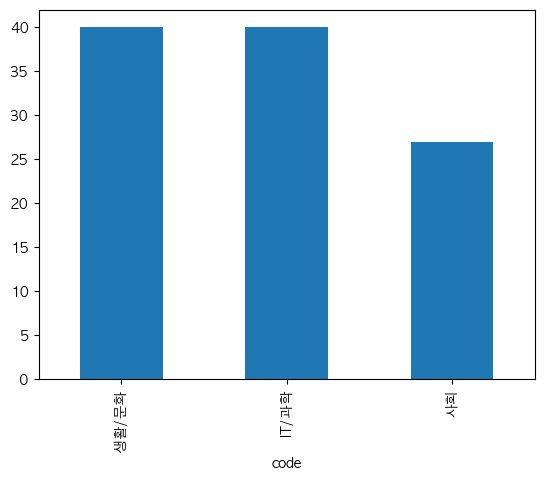

In [36]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "AppleGothic"

df['code'].value_counts().plot(kind = 'bar')

In [37]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학     40
1     사회     27
2  생활/문화     40


In [57]:
!pip3 install install mecab-python3

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [58]:
!pip3 install konlpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [59]:
!pip3 install mecab

Defaulting to user installation because normal site-packages is not writeable
  Using cached mecab-0.996.3.tar.gz (62 kB)
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-install-5rrx4bi0/mecab_1171586433bb4df9a2c3ed201a2206d7/setup.py'"'"'; __file__='"'"'/private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-install-5rrx4bi0/mecab_1171586433bb4df9a2c3ed201a2206d7/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-pip-egg-info-nevitpao
         cwd: /private/var/folders/b9/d_8nll_s47g6w2x0spn

In [60]:
!pip3 install install mecab-ko-dic

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [61]:
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

Exception: The MeCab dictionary does not exist at "/usr/local/lib/mecab/dic/mecab-ko-dic". Is the dictionary correctly installed?
You can also try entering the dictionary path when initializing the Mecab class: "Mecab('/some/dic/path')"

In [46]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [47]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [48]:
text_data = preprocessing(df['news'])
print(text_data[0])

NameError: name 'tokenizer' is not defined

In [ ]:
!pip3 install sklearn

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [44]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

NameError: name 'text_data' is not defined

In [62]:
!brew install mecab
!brew install mecab-ipadic
!brew install mecab-ko-dic
!pip install mecab-python3

zsh:1: command not found: brew
zsh:1: command not found: brew
zsh:1: command not found: brew
zsh:1: command not found: pip
